# Bank Marketing Campaign

Bank Campaign Marketing
Dataset information
- Four Datasets
    - bank-additional-full.csv
        - all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010)
        - 41118 rows, 21 columns
    - bank-additional.csv
        - 10% of first dataset, randomly selected
        - 4119 rows × 21 columns
    - bank-full.csv
        - All examples and 17 inputs, ordered by date
        - 45211 rows × 17 columns
    - bank-full.csv
        - 10% of the examples
        - 17 inputs
        - Randomly selected from third dataset
        - 4521 rows × 17 columns
    - Notes
        - Smaller datasets are used for resource intensive tasks (ex. SVM)
Variables
1. Bank client data:
    1. age (
        1. numeric)
    2. job :
        1.  type of job 
        2. (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    3. marital : 
        1. marital status 
        2. (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4. education 
        1. (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5. default: 
        1. has credit in default? 
        2. (categorical: 'no','yes','unknown')
    6. housing: 
        1. has housing loan? 
        2. (categorical: 'no','yes','unknown')
    7. loan: 
        1. has personal loan? 
        2. (categorical: 'no','yes','unknown')
2. Related with the last contact of the current campaign:
    1. contact: 
        1. contact communication type 
        2. (categorical: 'cellular','telephone') 
    2. month: 
        1. last contact month of year 
        2. (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    3. day_of_week: 
        1. last contact day of the week 
        2. (categorical: 'mon','tue','wed','thu','fri')
    4. duration: 
        1. last contact duration, in seconds (numeric). 
        2. Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
3. Other attributes:
    1. campaign: 
        1. number of contacts performed during this campaign and for this client 
        2. (numeric, includes last contact)
    2. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    3. previous: number of contacts performed before this campaign and for this client (numeric)
    4. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
4. Social and Economic Context Attributes
    1. emp.var.rate: employment variation rate - quarterly indicator (numeric)
    2. cons.price.idx: consumer price index - monthly indicator (numeric) 
    3. cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
    4. euribor3m: euribor 3 month rate - daily indicator (numeric)
    5. nr.employed: number of employees - quarterly indicator (numeric)
5. What WE need
    1. y - has the client subscribed a term deposit? (binary: 'yes','no')

In [2]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [3]:
#Created own CSVs with fixed columns
bankaddfull = pd.read_csv('bank-additional-full2.csv')
bankadd = pd.read_csv('bank-additional2.csv')
bankfull = pd.read_csv('bank-full2.csv')
bank = pd.read_csv('bank2.csv')

# Data Understanding

## Bank Additional Full Dataframe

In [4]:
bankaddfull

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [5]:
bankaddfull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
bankaddfull.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
#Looking for nulls
bankaddfull.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<AxesSubplot:>

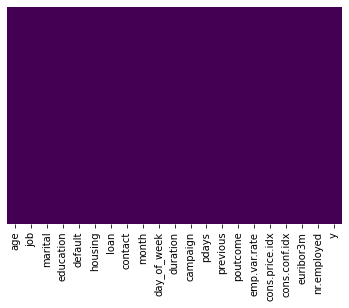

In [8]:
#Visualizing nulls
sns.heatmap(bankaddfull.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
#Checking for duplicates
bankaddfull.duplicated().sum()

12

In [10]:
#Dropping duplicates
bankaddfull=bankaddfull.drop_duplicates()

In [11]:
#checking if data was dropped or not
bankaddfull

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [12]:
#sns.pairplot(bankaddfull, hue='y')

In [14]:
bankaddfull.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000808,0.004622,-0.034381,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607
duration,-0.000808,1.000000,-0.071765,-0.047556,0.020600,-0.027941,0.005303,-0.008126,-0.032861,-0.044672
campaign,0.004622,-0.071765,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129
pdays,-0.034381,-0.047556,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659
previous,0.024379,0.020600,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411
emp.var.rate,-0.000242,-0.027941,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949
cons.price.idx,0.001009,0.005303,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945
cons.conf.idx,0.129075,-0.008126,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679
euribor3m,0.010852,-0.032861,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146
nr.employed,-0.017607,-0.044672,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000


In [15]:
#Splitting bankaddfull into two 
#DFs based on if the customer did/did not subscribe
yesaddfull = bankaddfull[bankaddfull['y']=='yes']
noaddfull = bankaddfull[bankaddfull['y']=='no']

In [17]:
noaddfull

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


## Bank Additional Dataframe

In [18]:
bankadd

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [19]:
#Checking for nulls
bankadd.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<AxesSubplot:>

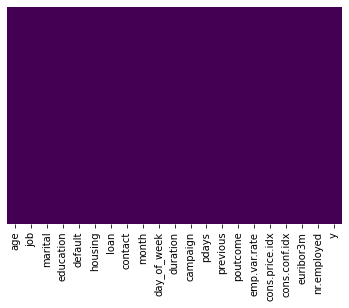

In [20]:
#Visualizing Nulls
sns.heatmap(bankadd.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
#Checking for duplicates
bankadd.duplicated().sum()

0

In [22]:
bankadd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [23]:
#sns.pairplot(bankadd, hue='y')

In [24]:
bankadd.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Bank Full Dataframe

In [25]:
bankfull

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [26]:
#Checking for nulls
bankfull.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<AxesSubplot:>

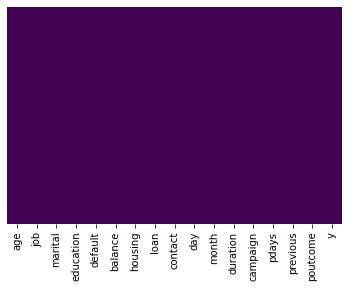

In [27]:
#Visualizing Nulls
sns.heatmap(bankfull.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [28]:
#Checking for Duplicates
bankfull.duplicated().sum()

0

In [29]:
#sns.pairplot(bankfull, hue='y')

In [30]:
bankfull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [31]:
bankfull.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Bank Dataframe

In [32]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [33]:
#Checking nulls
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<AxesSubplot:>

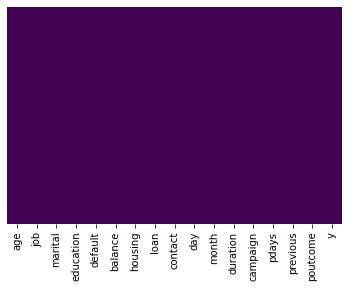

In [34]:
#Visualizing nulls
sns.heatmap(bank.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [35]:
#Checking for duplicates
bank.duplicated().sum()

0

In [36]:
#sns.pairplot(bank, hue='y')

In [37]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [38]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


For the purposes of this project, we will use the Bank Additional Full dataset, as it is the most complete dataset when it comes to the number of inputs and large sample size.

# Exploratory Data Analysis

In [39]:
bankaddfull.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Yes or No? 

Text(0.5, 1.0, 'Total Count of Yes or No')

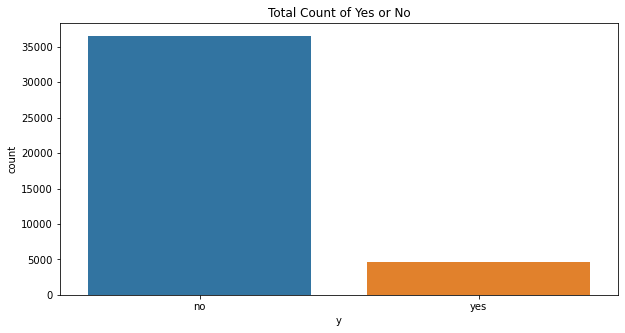

In [271]:
#Countplot of total Yes or No
plt.figure(figsize=(10,5))
sns.countplot(data=bankaddfull, x='y')
plt.title('Total Count of Yes or No')

In [41]:
#Percentage of yes
yespercent= (len(yesaddfull['y'])/len(bankaddfull['y']))*100
yespercent

11.266271614532737

A large proportion of the data is "no". Only 11.3% of the data  (3 SF.) is yes.

## Age 

Text(0.5, 1.0, 'Distribution of Ages Contacted')

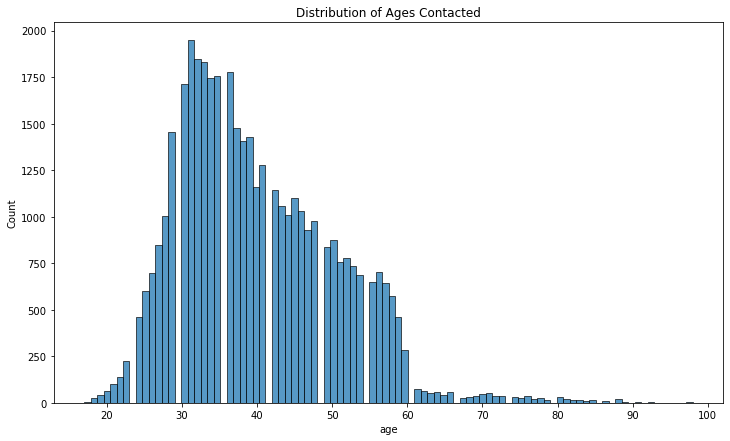

In [275]:
#Histogram of the Ages contacted
plt.figure(figsize=(12,7))
totalagecount=sns.histplot(data=bankaddfull, x='age')
plt.title('Distribution of Ages Contacted')

Text(0.5, 1.0, 'Distribution of Ages Contacted, Divided into Yes or No')

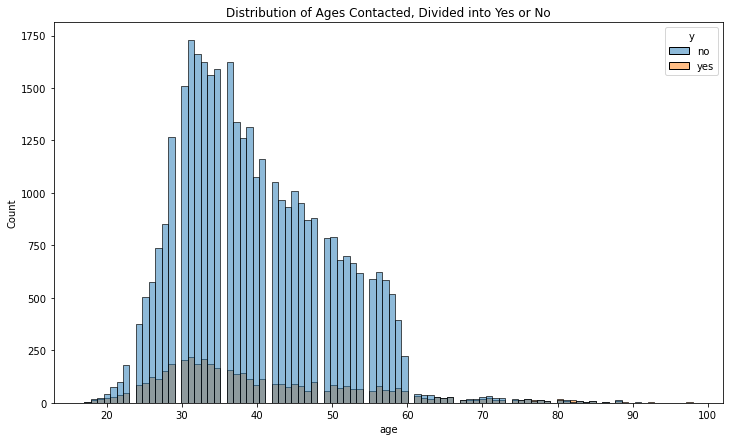

In [274]:
#Histogram of Ages Contacted, Divided into Yes or No
plt.figure(figsize=(12,7))
sns.histplot(data=bankaddfull, x='age', hue='y')
plt.title('Distribution of Ages Contacted, Divided into Yes or No')

In [44]:
#Count number of yes according to age of customer
yesAgeCount=yesaddfull['age'].value_counts()
yesAgeCount

31    220
33    210
30    202
29    186
32    184
     ... 
84      3
89      2
98      2
17      2
87      1
Name: age, Length: 75, dtype: int64

In [45]:
#Count total number of customers per age
totalAgeCount=bankaddfull['age'].value_counts()
totalAgeCount

31    1947
32    1845
33    1833
36    1779
35    1758
      ... 
91       2
98       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64

In [46]:
#Find percentage of customers who said yes based on their age
yesAgePercent= (yesAgeCount/totalAgeCount)*100
yesAgePercent= yesAgePercent.fillna(value=0)
yesAgePercent

17     40.000000
18     42.857143
19     47.619048
20     35.384615
21     28.431373
         ...    
91      0.000000
92     75.000000
94      0.000000
95      0.000000
98    100.000000
Name: age, Length: 78, dtype: float64

In [47]:
#Create a DF baased on the series, and reset the index
yesAgeDF = pd.DataFrame(yesAgePercent)
yesAgeDF = yesAgeDF.reset_index()
yesAgeDF

,index,age
0,17,40.000000
1,18,42.857143
2,19,47.619048
3,20,35.384615
4,21,28.431373
...,...,...
73,91,0.000000
74,92,75.000000
75,94,0.000000
76,95,0.000000


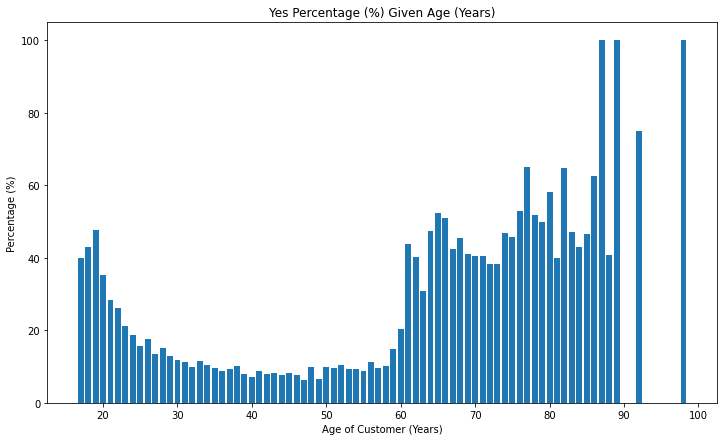

In [273]:
#Yes percent given age
plt.figure(figsize=(12,7))
plt.bar(data=yesAgeDF,height='age',x='index')
plt.title('Yes Percentage (%) Given Age (Years)')
plt.xlabel('Age of Customer (Years)')
plt.ylabel('Percentage (%)')
plt.ylim=([0,50])

Text(0.5, 1.0, 'Boxplot of Customer Age (years) Divided into Yes/No')

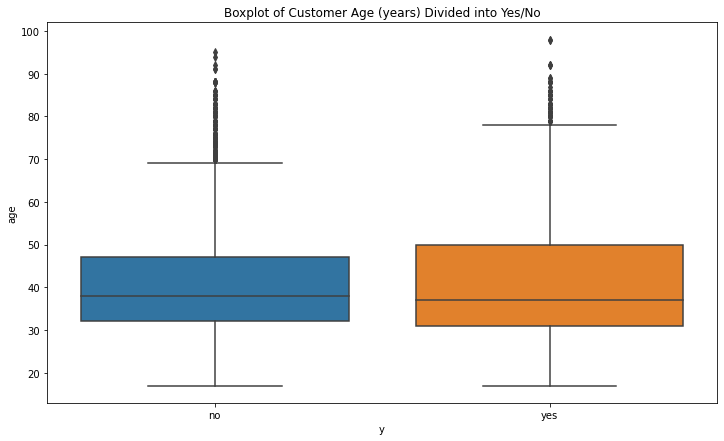

In [272]:
#Boxplot of Customer Age (years) Divided into Yes/No
plt.figure(figsize=(12,7))
sns.boxplot(data=bankaddfull,x='y',y='age')
plt.title('Boxplot of Customer Age (years) Divided into Yes/No')

There is almost no significant difference when it comes to the age. Although it may seem like younger people (20-40) have higher amounts of positive responses, there are also a higher number of calls to that demographic. In both cases, the median is similar (30-40), which also shows that there is no significant difference in age. However it seems likepeople in their early 20s and 60+  year olds are more likely to subscribe

## Job 

Text(0.5, 1.0, 'Job Title')

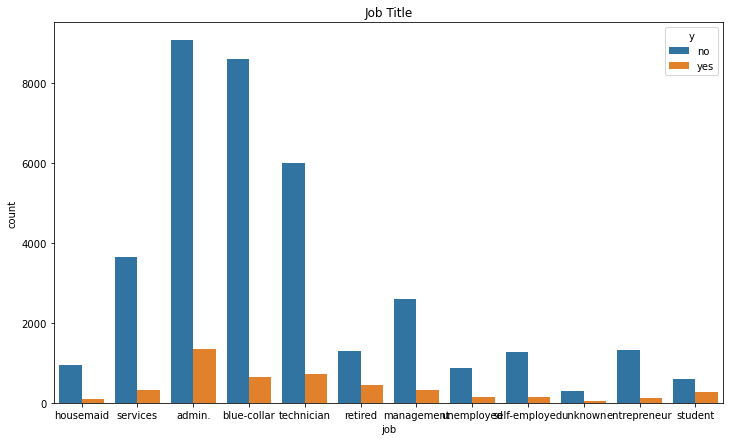

In [276]:
#Countplot of Jobs divided into Yes/No
plt.figure(figsize=(12,7)) 
sns.countplot(data=bankaddfull, x='job', hue='y')
plt.title('Job Title')

In [51]:
#Count number of yes according to job of customer
yesJobCount=yesaddfull['job'].value_counts()
yesJobCount

admin.           1351
technician        730
blue-collar       638
retired           434
management        328
services          323
student           275
self-employed     149
unemployed        144
entrepreneur      124
housemaid         106
unknown            37
Name: job, dtype: int64

In [52]:
#Count total number of customers per job
totalJobCount=bankaddfull['job'].value_counts()
totalJobCount

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [53]:
#Find percentage of customers who said yes based on their job
yesJobPercent= (yesJobCount/totalJobCount)*100
yesJobPercent= yesJobPercent.fillna(value=0)
yesJobPercent

admin.           12.966695
blue-collar       6.895061
entrepreneur      8.516484
housemaid        10.000000
management       11.217510
retired          25.261932
self-employed    10.485574
services          8.142173
student          31.428571
technician       10.832468
unemployed       14.201183
unknown          11.212121
Name: job, dtype: float64

In [54]:
#Create a DF baased on the series, and reset the index
yesJobDF = pd.DataFrame(yesJobPercent)
yesJobDF = yesJobDF.reset_index()
yesJobDF

,index,job
0,admin.,12.966695
1,blue-collar,6.895061
2,entrepreneur,8.516484
3,housemaid,10.000000
4,management,11.217510
5,retired,25.261932
6,self-employed,10.485574
7,services,8.142173
8,student,31.428571
9,technician,10.832468


Text(0, 0.5, 'Percentage (%)')

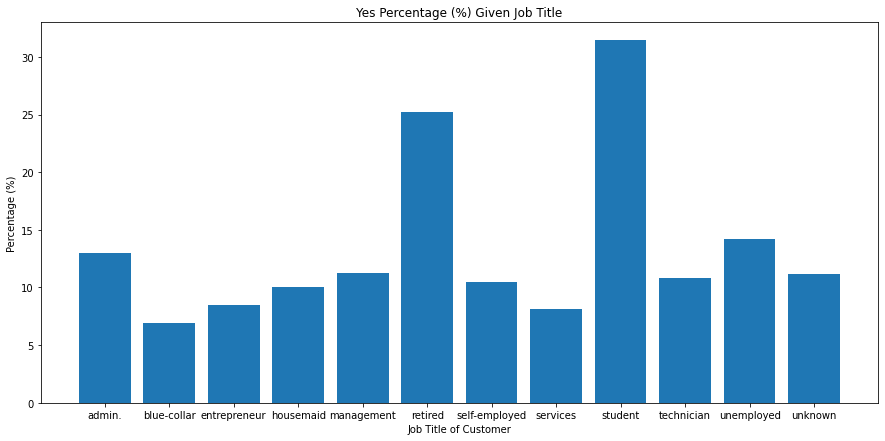

In [55]:
#Yes percent given Job Title
plt.figure(figsize=(15,7))
plt.bar(data=yesJobDF, x='index',height='job')
plt.title('Yes Percentage (%) Given Job Title')
plt.xlabel('Job Title of Customer')
plt.ylabel('Percentage (%)')

Although there are higher number of Admins having a positive outcome, there are also a higher amount of people that are called. Percentage-wise, Students and Retired customers have the highest yes percentage with 31.4% and 25.3% respectively. Unemployed and Admins also have a high percentage, but not as high as Retirees and Students

## Marital 

Text(0.5, 1.0, 'Marital Status')

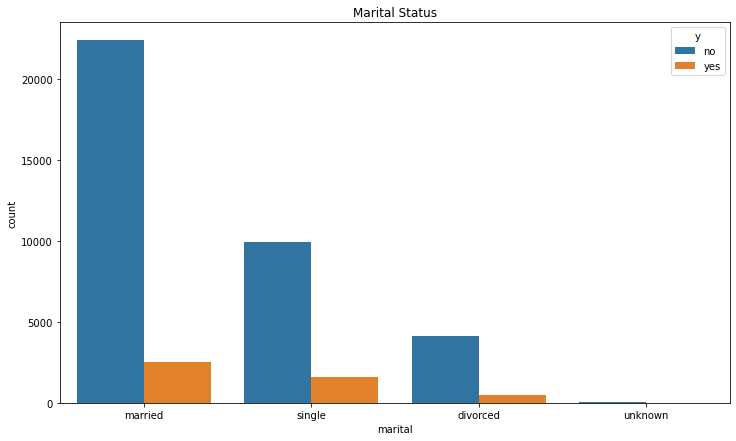

In [277]:
#Countplot of Marital Status divided into Yes/No
plt.figure(figsize=(12,7)) 
sns.countplot(data=bankaddfull, x='marital', hue='y')
plt.title('Marital Status')

In [57]:
#Count number of yes according to marital of customer
yesMaritalCount=yesaddfull['marital'].value_counts()
yesMaritalCount

married     2531
single      1620
divorced     476
unknown       12
Name: marital, dtype: int64

In [58]:
#Count total number of customers per marital status
totalMaritalCount=bankaddfull['marital'].value_counts()
totalMaritalCount

married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

In [59]:
#Find percentage of customers who said yes based on their marital status
yesMaritalPercent= (yesMaritalCount/totalMaritalCount)*100
yesMaritalPercent= yesMaritalPercent.fillna(value=0)
yesMaritalPercent

married     10.156093
single      14.008993
divorced    10.323140
unknown     15.000000
Name: marital, dtype: float64

In [60]:
#Create a DF baased on the series, and reset the index
yesMaritalDF = pd.DataFrame(yesMaritalPercent)
yesMaritalDF = yesMaritalDF.reset_index()
yesMaritalDF

,index,marital
0,married,10.156093
1,single,14.008993
2,divorced,10.323140
3,unknown,15.000000


Text(0, 0.5, 'Percentage (%)')

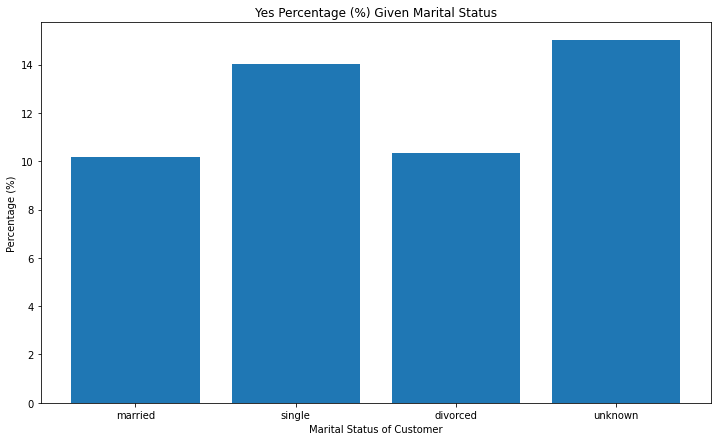

In [61]:
#Yes percent given Marital Status
plt.figure(figsize=(12,7))
plt.bar(data=yesMaritalDF,height='marital',x='index')
plt.title('Yes Percentage (%) Given Marital Status')
plt.xlabel('Marital Status of Customer')
plt.ylabel('Percentage (%)')

There is no significant difference between all four groups, although customers that are single and unknown marital status have the highest success percentage.

## Education

Text(0.5, 1.0, 'Type of Education')

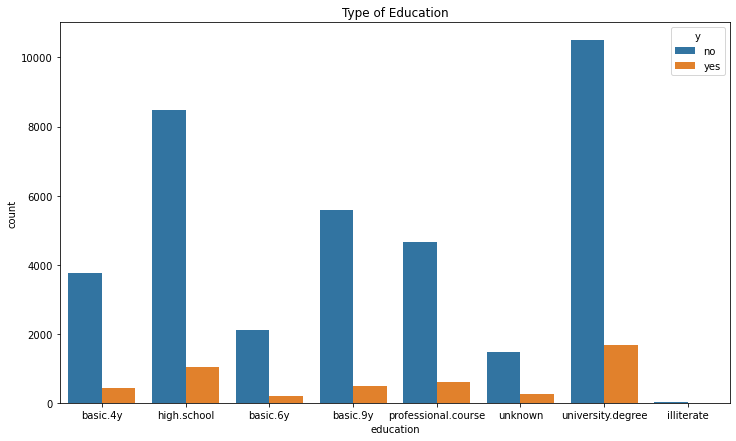

In [278]:
#Countplot of Education Type divided into Yes/No
plt.figure(figsize=(12,7)) 
sns.countplot(data=bankaddfull, x='education', hue='y')
plt.title('Type of Education')

In [63]:
#Count number of yes according to education of customer
yesEducationCount=yesaddfull['education'].value_counts()
yesEducationCount

university.degree      1669
high.school            1031
professional.course     595
basic.9y                473
basic.4y                428
unknown                 251
basic.6y                188
illiterate                4
Name: education, dtype: int64

In [64]:
#Count total number of customers per education type
totalEducationCount=bankaddfull['education'].value_counts()
totalEducationCount

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

In [65]:
#Find percentage of customers who said yes based on their education
yesEducationPercent= (yesEducationCount/totalEducationCount)*100
yesEducationPercent= yesEducationPercent.fillna(value=0)
yesEducationPercent

basic.4y               10.249042
basic.6y                8.206024
basic.9y                7.824648
high.school            10.838940
illiterate             22.222222
professional.course    11.354962
university.degree      13.720816
unknown                14.508671
Name: education, dtype: float64

In [66]:
#Create a DF baased on the series, and reset the index
yesEducationDF = pd.DataFrame(yesEducationPercent)
yesEducationDF = yesEducationDF.reset_index()
yesEducationDF

,index,education
0,basic.4y,10.249042
1,basic.6y,8.206024
2,basic.9y,7.824648
3,high.school,10.838940
4,illiterate,22.222222
5,professional.course,11.354962
6,university.degree,13.720816
7,unknown,14.508671


Text(0, 0.5, 'Percentage (%)')

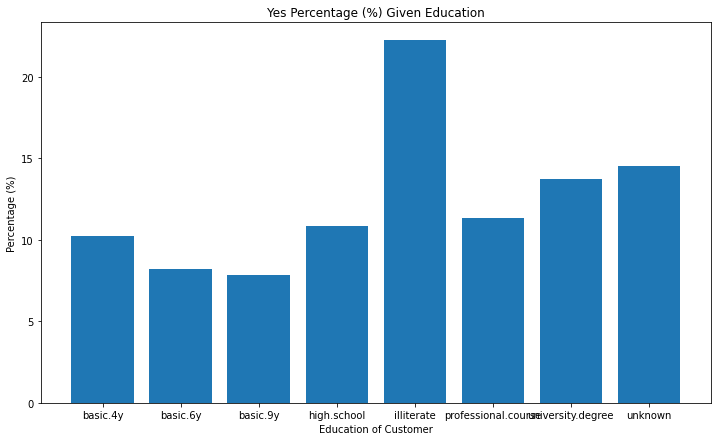

In [67]:
#Yes percent given Education
plt.figure(figsize=(12,7))
plt.bar(data=yesEducationDF,height='education',x='index')
plt.title('Yes Percentage (%) Given Education')
plt.xlabel('Education of Customer')
plt.ylabel('Percentage (%)')

Illiterate people have the highest chance of success, although the rest of the data is similar.

## Default 

Text(0.5, 1.0, 'Default Status')

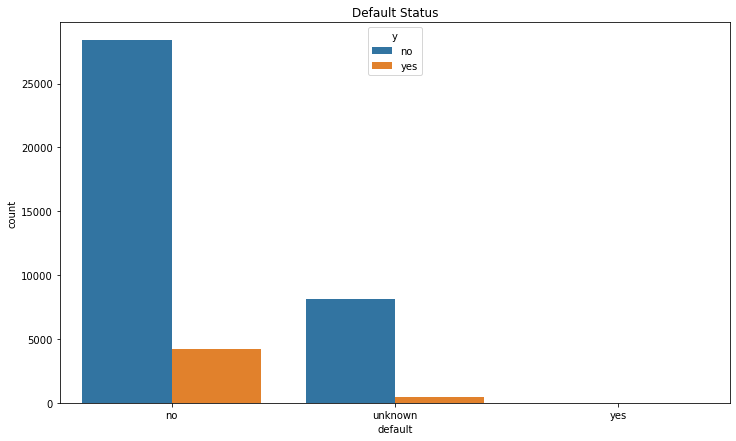

In [279]:
#Countplot of Default Status divided into Yes/No
plt.figure(figsize=(12,7)) 
sns.countplot(data=bankaddfull, x='default', hue='y')
plt.title('Default Status')

In [69]:
#Count number of yes according to default status of customer
yesDefaultCount=yesaddfull['default'].value_counts()
yesDefaultCount

no         4196
unknown     443
Name: default, dtype: int64

In [70]:
#Count total number of customers per default status
totalDefaultCount=bankaddfull['default'].value_counts()
totalDefaultCount

no         32577
unknown     8596
yes            3
Name: default, dtype: int64

In [71]:
#Find percentage of customers who said yes based on their default status
yesDefaultPercent= (yesDefaultCount/totalDefaultCount)*100
yesDefaultPercent= yesDefaultPercent.fillna(value=0)
yesDefaultPercent

no         12.880253
unknown     5.153560
yes         0.000000
Name: default, dtype: float64

In [72]:
#Create a DF baased on the series, and reset the index
yesDefaultDF = pd.DataFrame(yesDefaultPercent)
yesDefaultDF = yesDefaultDF.reset_index()
yesDefaultDF

,index,default
0,no,12.880253
1,unknown,5.153560
2,yes,0.000000


Text(0, 0.5, 'Percentage (%)')

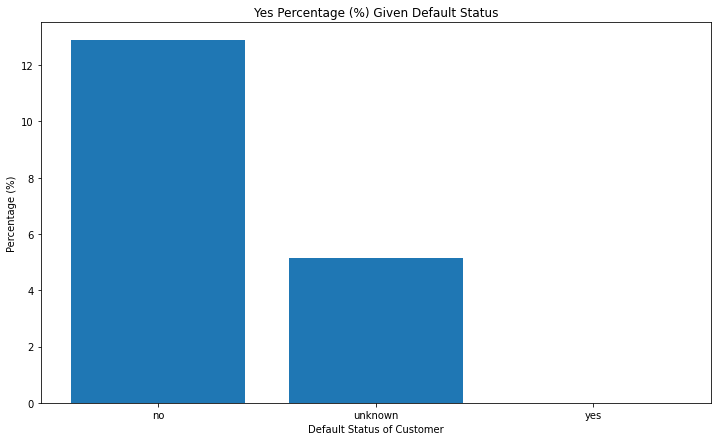

In [73]:
#Yes percent given Default Status
plt.figure(figsize=(12,7))
plt.bar(data=yesDefaultDF,height='default',x='index')
plt.title('Yes Percentage (%) Given Default Status')
plt.xlabel('Default Status of Customer')
plt.ylabel('Percentage (%)')

There is a higher percentage of people who DID NOT previously default on their past loans who subscribe to the term deposit. People who have defaulted on their loans are not likely to subscribe, however this could be due to the small sample size, and high amounts of unknowns.

## Housing 

Text(0.5, 1.0, 'Housing Loan')

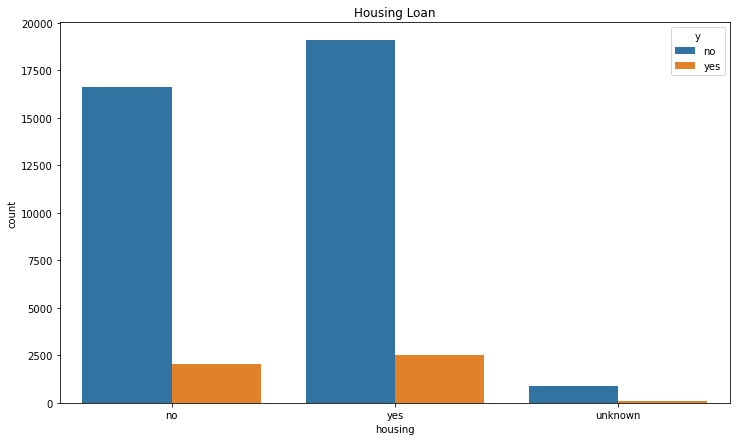

In [280]:
#Countplot of Housing Loan divided into Yes/No
plt.figure(figsize=(12,7)) 
sns.countplot(data=bankaddfull, x='housing', hue='y')
plt.title('Housing Loan')

In [75]:
#Count number of yes according to whether or not the customer has a housing loan
yesHousingCount=yesaddfull['housing'].value_counts()
yesHousingCount

yes        2507
no         2025
unknown     107
Name: housing, dtype: int64

In [76]:
#Count total number of customers that do or don't have a housing loan
totalHousingCount=bankaddfull['housing'].value_counts()
totalHousingCount

yes        21571
no         18615
unknown      990
Name: housing, dtype: int64

In [77]:
#Find percentage of customers who said yes based on if they have a housing loan
yesHousingPercent= (yesHousingCount/totalHousingCount)*100
yesHousingPercent=yesHousingPercent.fillna(value=0)
yesHousingPercent

yes        11.622085
no         10.878324
unknown    10.808081
Name: housing, dtype: float64

In [78]:
#Create a DF baased on the series, and reset the index
yesHousingDF = pd.DataFrame(yesHousingPercent)
yesHousingDF = yesHousingDF.reset_index()
yesHousingDF

,index,housing
0,yes,11.622085
1,no,10.878324
2,unknown,10.808081


Text(0, 0.5, 'Percentage (%)')

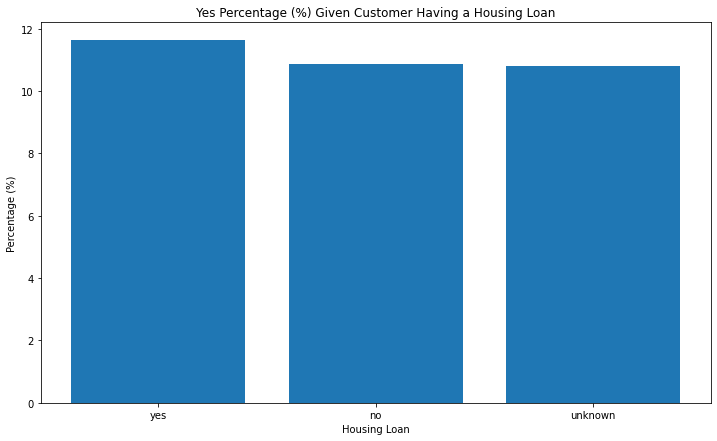

In [79]:
#Yes percent given Housing Loan
plt.figure(figsize=(12,7))
plt.bar(data=yesHousingDF,height='housing',x='index')
plt.title('Yes Percentage (%) Given Customer Having a Housing Loan')
plt.xlabel('Housing Loan')
plt.ylabel('Percentage (%)')

There is no significant difference between all three groups, meaning that they are just as likely to accept or deny the subscription.

## Previous outcome (poutcome)

Text(0.5, 1.0, 'Previous Outcome')

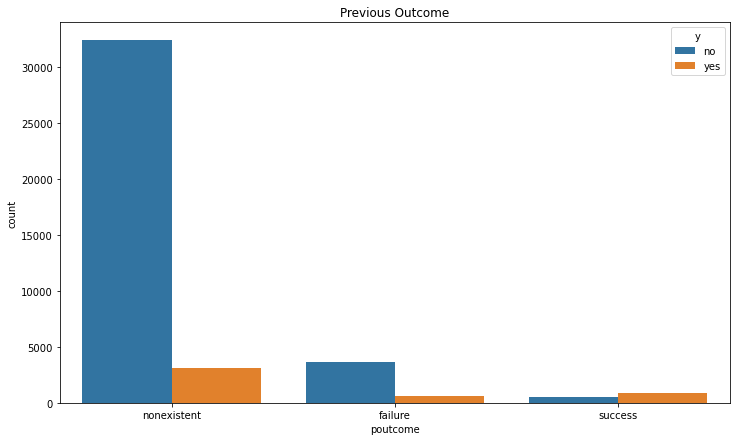

In [281]:
#Countplot of the Previous Outcome divided into Yes/No
plt.figure(figsize=(12,7)) 
sns.countplot(data=bankaddfull, x='poutcome', hue='y')
plt.title('Previous Outcome')

In [81]:
#Count number of yes according to the previous outcome of the customer
yesPOutcomeCount=yesaddfull['poutcome'].value_counts()
yesPOutcomeCount

nonexistent    3140
success         894
failure         605
Name: poutcome, dtype: int64

In [82]:
#Count total number of customers per previous outcome
totalPOutcomeCount=bankaddfull['poutcome'].value_counts()
totalPOutcomeCount

nonexistent    35551
failure         4252
success         1373
Name: poutcome, dtype: int64

In [83]:
#Find percentage of customers who said yes based on the previous outcome
yesPOutcomePercent= (yesPOutcomeCount/totalPOutcomeCount)*100
yesPOutcomePercent=yesPOutcomePercent.fillna(value=0)
yesPOutcomePercent

failure        14.228598
nonexistent     8.832382
success        65.112891
Name: poutcome, dtype: float64

In [84]:
#Create a DF baased on the series, and reset the index
yesPOutcomeDF = pd.DataFrame(yesPOutcomePercent)
yesPOutcomeDF = yesPOutcomeDF.reset_index()
yesPOutcomeDF

,index,poutcome
0,failure,14.228598
1,nonexistent,8.832382
2,success,65.112891


Text(0, 0.5, 'Percentage (%)')

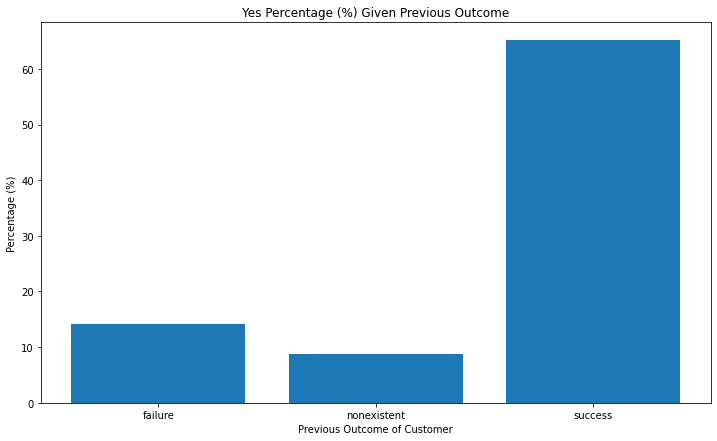

In [85]:
#Yes percent given Previous Outcome
plt.figure(figsize=(12,7))
plt.bar(data=yesPOutcomeDF,height='poutcome',x='index')
plt.title('Yes Percentage (%) Given Previous Outcome')
plt.xlabel('Previous Outcome of Customer')
plt.ylabel('Percentage (%)')

People who have already subscribed to a term deposit are very likely to subscribe to another one, whereas customers who have not are not likely to subscribe. Customers who have never been approached before are even less likely to subscribe.

## Day of Week 

Text(0.5, 1.0, 'Day of the Week')

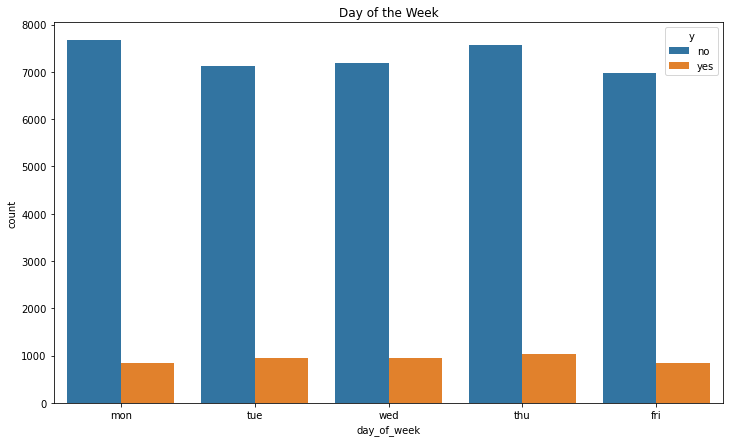

In [282]:
#Countplot of the Day of the Week divided into Yes/No
plt.figure(figsize=(12,7)) 
sns.countplot(data=bankaddfull, x='day_of_week', hue='y')
plt.title('Day of the Week')

In [87]:
#Count number of yes according to the day the customer was contacted
yesDayWeekCount=yesaddfull['day_of_week'].value_counts()
yesDayWeekCount

thu    1044
tue     953
wed     949
mon     847
fri     846
Name: day_of_week, dtype: int64

In [88]:
#Count total number of customers per day of week
totalDayWeekCount=bankaddfull['day_of_week'].value_counts()
totalDayWeekCount

thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: day_of_week, dtype: int64

In [89]:
#Find percentage of customers who said yes based on the day of the week
yesDayWeekPercent= (yesDayWeekCount/totalDayWeekCount)*100
yesDayWeekPercent=yesDayWeekPercent.fillna(value=0)
yesDayWeekPercent

fri    10.810120
mon     9.950658
thu    12.114180
tue    11.785803
wed    11.667076
Name: day_of_week, dtype: float64

In [90]:
#Create a DF baased on the series, and reset the index
yesDayWeekDF = pd.DataFrame(yesDayWeekPercent)
yesDayWeekDF = yesDayWeekDF.reset_index()
yesDayWeekDF

,index,day_of_week
0,fri,10.810120
1,mon,9.950658
2,thu,12.114180
3,tue,11.785803
4,wed,11.667076


Text(0, 0.5, 'Percentage (%)')

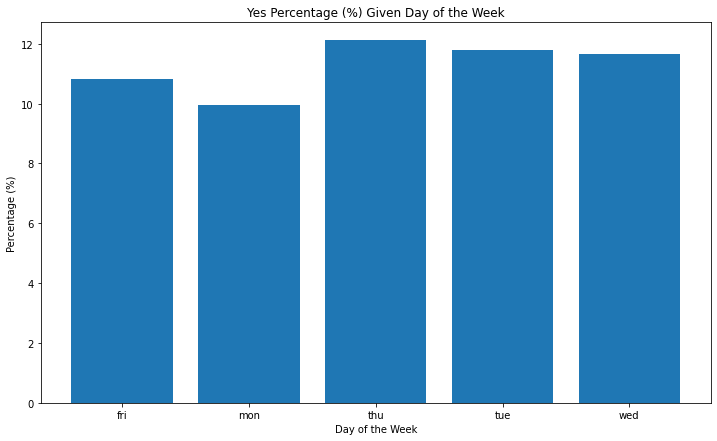

In [91]:
#Yes percent given age
plt.figure(figsize=(12,7))
plt.bar(data=yesDayWeekDF,height='day_of_week',x='index')
plt.title('Yes Percentage (%) Given Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Percentage (%)')

There is no significant difference in positive outcomes between the days of the week.

## Month

Text(0.5, 1.0, 'Month of the Year')

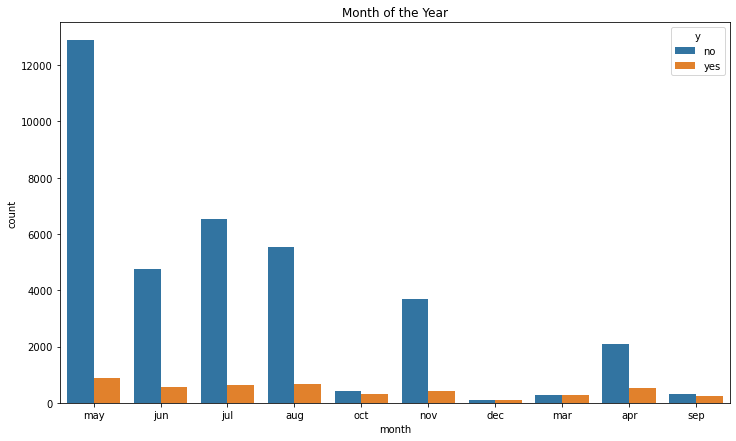

In [283]:
#Countplot of Month divided into Yes/No
plt.figure(figsize=(12,7)) 
sns.countplot(data=bankaddfull, x='month', hue='y')
plt.title('Month of the Year')

In [93]:
#Count number of yes according to the month the customer was contacted
yesMonthCount=yesaddfull['month'].value_counts()
yesMonthCount

may    886
aug    655
jul    648
jun    559
apr    539
nov    416
oct    315
mar    276
sep    256
dec     89
Name: month, dtype: int64

In [94]:
#Count total number of customers per month
totalMonthCount=bankaddfull['month'].value_counts()
totalMonthCount

may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [95]:
#Find percentage of customers who said yes based on the month
yesMonthPercent= (yesMonthCount/totalMonthCount)*100
yesMonthPercent=yesMonthPercent.fillna(value=0)
yesMonthPercent

apr    20.486507
aug    10.605570
dec    48.901099
jul     9.038918
jun    10.511470
mar    50.549451
may     6.435680
nov    10.146341
oct    43.933054
sep    44.912281
Name: month, dtype: float64

In [96]:
#Create a DF baased on the series, and reset the index
yesMonthDF = pd.DataFrame(yesMonthPercent)
yesMonthDF = yesMonthDF.reset_index()
yesMonthDF

,index,month
0,apr,20.486507
1,aug,10.605570
2,dec,48.901099
3,jul,9.038918
4,jun,10.511470
5,mar,50.549451
6,may,6.435680
7,nov,10.146341
8,oct,43.933054
9,sep,44.912281


Text(0, 0.5, 'Percentage (%)')

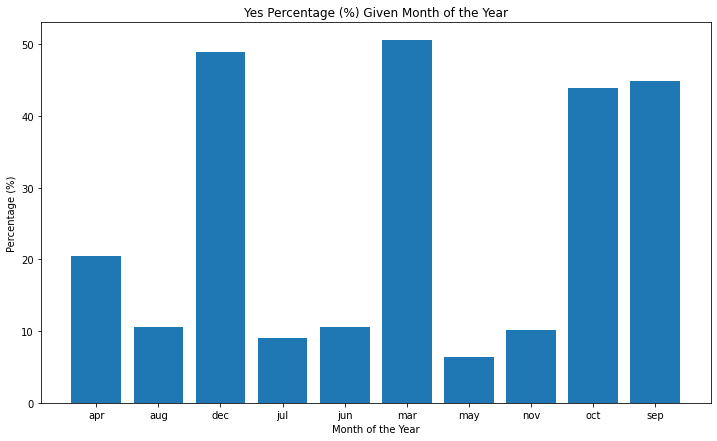

In [97]:
#Yes percent given Month
plt.figure(figsize=(12,7))
plt.bar(data=yesMonthDF,height='month',x='index')
plt.title('Yes Percentage (%) Given Month of the Year')
plt.xlabel('Month of the Year')
plt.ylabel('Percentage (%)')

December, October, March, and September seem to be the best months to call as there seems to be a similar likelihood of a positive and negative outocme. However,this observation should be taken with a grain of salt as there is only a small sample size for each of those months

## Loan

Text(0.5, 1.0, 'Personal Loan')

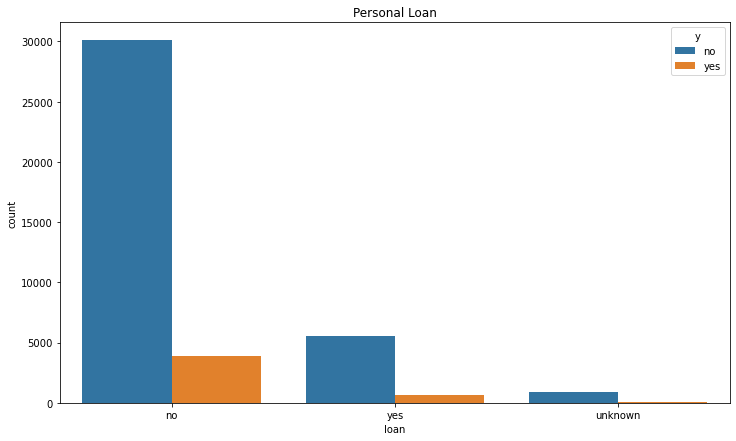

In [284]:
#Countplot of Loan status divided into Yes/No
plt.figure(figsize=(12,7)) 
sns.countplot(data=bankaddfull, x='loan', hue='y')
plt.title('Personal Loan')

In [99]:
#Count number of yes according whether the customer has a loan or not
yesLoanCount=yesaddfull['loan'].value_counts()
yesLoanCount

no         3849
yes         683
unknown     107
Name: loan, dtype: int64

In [100]:
#Count total number of customers per loan status
totalLoanCount=bankaddfull['loan'].value_counts()
totalLoanCount

no         33938
yes         6248
unknown      990
Name: loan, dtype: int64

In [101]:
#Find percentage of customers who said yes based on if they have a loan
yesLoanPercent= (yesLoanCount/totalLoanCount)*100
yesLoanPercent=yesLoanPercent.fillna(value=0)
yesLoanPercent

no         11.341269
yes        10.931498
unknown    10.808081
Name: loan, dtype: float64

In [102]:
#Create a DF baased on the series, and reset the index
yesLoanDF = pd.DataFrame(yesLoanPercent)
yesLoanDF = yesLoanDF.reset_index()
yesLoanDF

,index,loan
0,no,11.341269
1,yes,10.931498
2,unknown,10.808081


Text(0, 0.5, 'Percentage (%)')

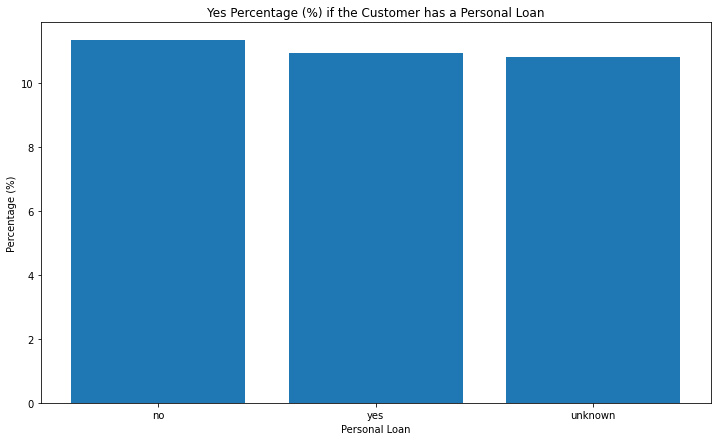

In [103]:
#Yes percent given Loan
plt.figure(figsize=(12,7))
plt.bar(data=yesLoanDF,height='loan',x='index')
plt.title('Yes Percentage (%) if the Customer has a Personal Loan')
plt.xlabel('Personal Loan')
plt.ylabel('Percentage (%)')

There is no significant difference between all groups.

## Contact

Text(0.5, 1.0, 'Method of Contact')

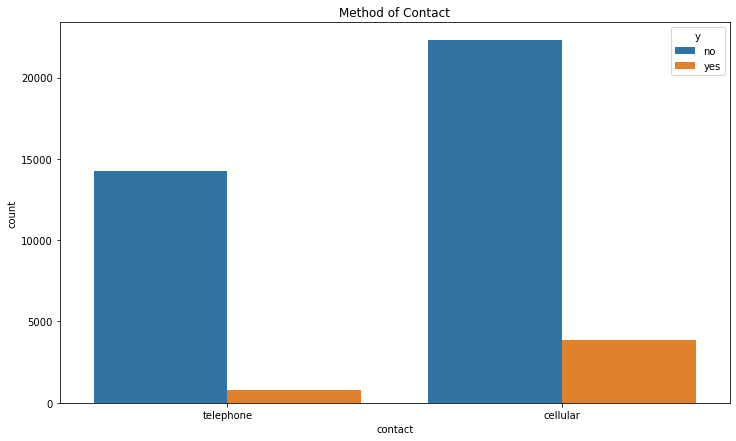

In [285]:
#Countplot of Contact Method divided into Yes/No
plt.figure(figsize=(12,7)) 
sns.countplot(data=bankaddfull, x='contact', hue='y')
plt.title('Method of Contact')

In [105]:
#Count number of yes according to contact method
yesContactCount=yesaddfull['contact'].value_counts()
yesContactCount

cellular     3852
telephone     787
Name: contact, dtype: int64

In [106]:
#Count total number of customers per contact method
totalContactCount=bankaddfull['contact'].value_counts()
totalContactCount

cellular     26135
telephone    15041
Name: contact, dtype: int64

In [107]:
#Find percentage of customers who said yes based on the contact method
yesContactPercent= (yesContactCount/totalContactCount)*100
yesContactPercent=yesContactPercent.fillna(value=0)
yesContactPercent

cellular     14.738856
telephone     5.232365
Name: contact, dtype: float64

In [108]:
#Create a DF baased on the series, and reset the index
yesContactDF = pd.DataFrame(yesContactPercent)
yesContactDF = yesContactDF.reset_index()
yesContactDF

,index,contact
0,cellular,14.738856
1,telephone,5.232365


Text(0, 0.5, 'Percentage (%)')

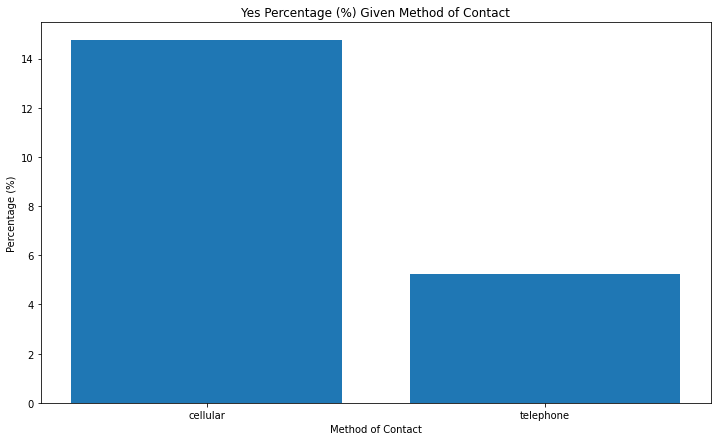

In [109]:
#Yes percent given Contact Type
plt.figure(figsize=(12,7))
plt.bar(data=yesContactDF,height='contact',x='index')
plt.title('Yes Percentage (%) Given Method of Contact')
plt.xlabel('Method of Contact')
plt.ylabel('Percentage (%)')

There is an  approximately 8-9% difference between the groups. Contacting a customer's cellphone is a better option than telephone.

## Duration 

Text(0.5, 1.0, 'Duration of Contact')

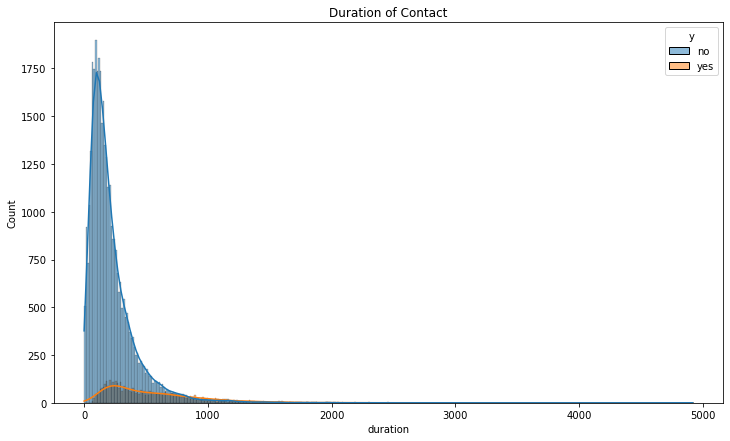

In [286]:
#Histogram of the Duration of Contact divided into Yes/No
plt.figure(figsize=(12,7))
sns.histplot(data=bankaddfull,hue='y',x='duration', kde=True)
plt.title('Duration of Contact')

Text(0.5, 1.0, 'Duration of Contact')

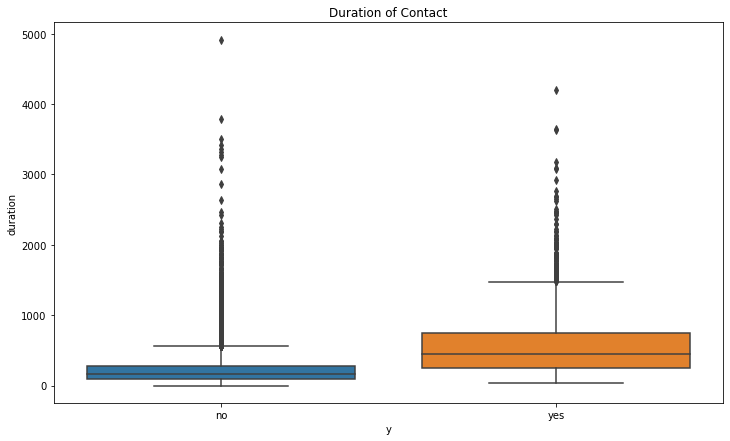

In [287]:
#Boxplot of the Duration of Contact divided into Yes/No
plt.figure(figsize=(12,7))
sns.boxplot(data=bankaddfull,x='y',y='duration')
plt.title('Duration of Contact')

In [112]:
yesaddfull['duration'].median()

449.0

In [113]:
noaddfull['duration'].median()

164.0

It is useful to use Duration as a predcition for the target variable "y". There is a significant difference in the median of those who said yes and no. People who said yes had a median difference of 285.5 seconds compared to those who said no.

## Employment Variation Rate (emp.var.rate)

"Cylical employment variation is essentially the variation of how many people are being hired or fired due to the shifts in the conditions of the economy. When the economy is in a recession or depression, people should be more conservative with their money and how the spend it because their financial future is less clear due to cyclical unemployment. When the economy is at its peak, individuals can be more open to risky investments because their employment options are greater."
>Source: https://www.quora.com/What-is-meant-by-employment-variation-rate-Does-it-affect-in-any-way-the-financial-decisions-that-an-individual-takes

Text(0.5, 1.0, 'Employment Variation Rate')

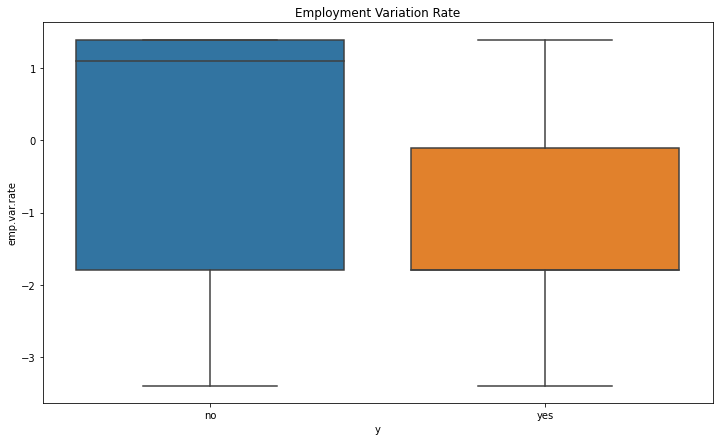

In [288]:
#Boxplot of the Employment Variation Rate divided into Yes/No
plt.figure(figsize=(12,7))
sns.boxplot(data=bankaddfull,x='y',y='emp.var.rate')
plt.title('Employment Variation Rate')

Text(0.5, 1.0, 'Employment Variation Rate')

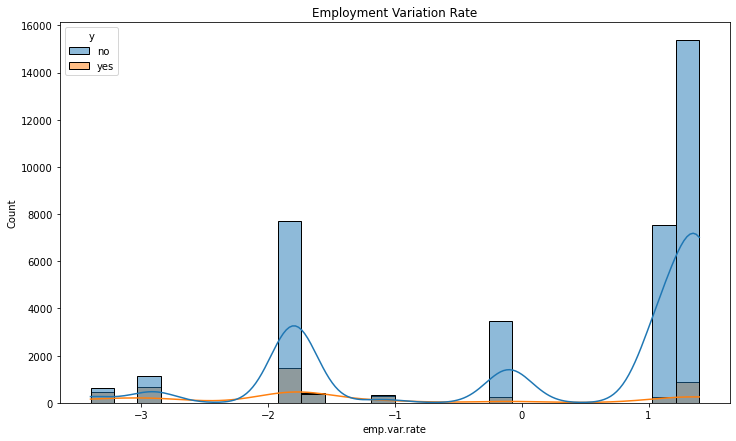

In [289]:
#Histogram of the Employment Variation Rate divided into Yes/No
plt.figure(figsize=(12,7))
sns.histplot(data=bankaddfull,hue='y',x='emp.var.rate', kde=True)
plt.title('Employment Variation Rate')

A low employment variation rate is more likely to yield higher positive results

## Consumer Price Index (cons.price.idx)

The Consumer Price Index (CPI) is a measure that examines the weighted average of prices of a basket of consumer goods and services, such as transportation, food, and medical care. It is calculated by taking price changes for each item in the predetermined basket of goods and averaging them. Changes in the CPI are used to assess price changes associated with the cost of living. 
>Source: https://www.investopedia.com/terms/c/consumerpriceindex.asp

Text(0.5, 1.0, 'Consumer Price Index')

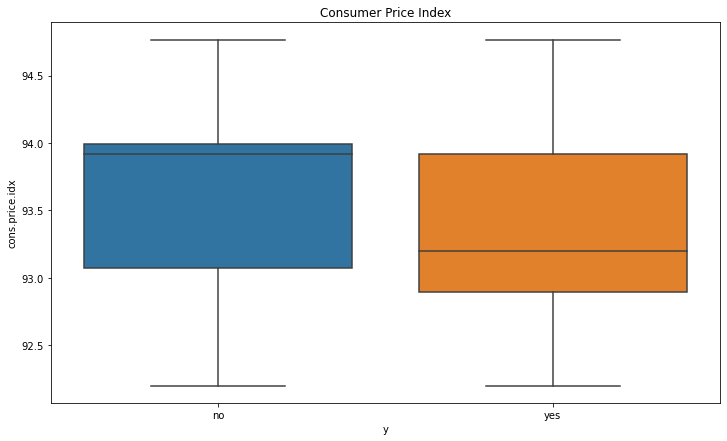

In [290]:
#Boxplot of the Consumer Price Index divided into Yes/No
plt.figure(figsize=(12,7))
sns.boxplot(data=bankaddfull,x='y',y='cons.price.idx')
plt.title('Consumer Price Index')

Text(0.5, 1.0, 'Consumer Price Index')

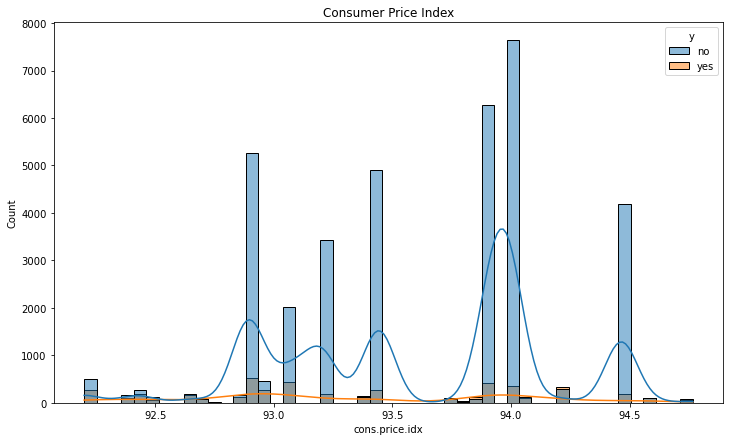

In [291]:
#Histogram of the Consumer Price Index divided into Yes/No
plt.figure(figsize=(12,7))
sns.histplot(data=bankaddfull,hue='y',x='cons.price.idx', kde=True)
plt.title('Consumer Price Index')

There is a significant difference in the median of yes and no. This could mean that the CPI is an important factor

## Consumer Confidence Index (cons.conf.idx)

The Consumer Confidence Index (CCI) is a survey, administered by The Conference Board, that measures how optimistic or pessimistic consumers are regarding their expected financial situation. The CCI is based on the premise that if consumers are optimistic, they will spend more and stimulate the economy but if they are pessimistic then their spending patterns could lead to a recession. 
>Source: https://www.investopedia.com/terms/c/cci.asp

Text(0.5, 1.0, 'Consumer Confidence Index')

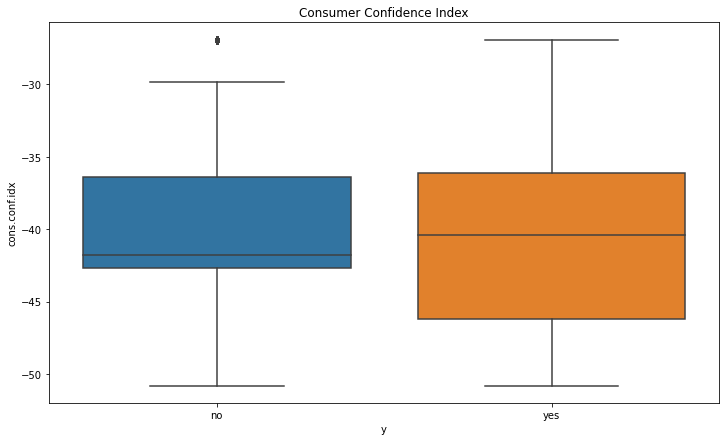

In [292]:
#Boxplot of the Consumer Confidence Index divided into Yes/No
plt.figure(figsize=(12,7))
sns.boxplot(data=bankaddfull,x='y',y='cons.conf.idx')
plt.title('Consumer Confidence Index')

Text(0.5, 1.0, 'Consumer Confidence Index')

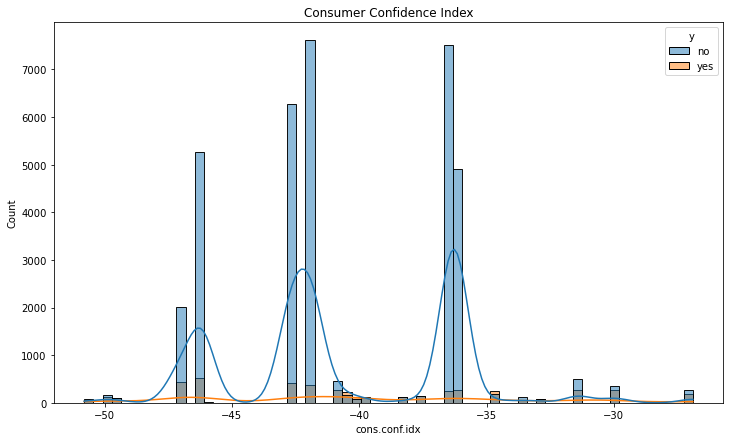

In [293]:
#Histogram of the Consumer Confidence Index divided into Yes/No
plt.figure(figsize=(12,7))
sns.histplot(data=bankaddfull,hue='y',x='cons.conf.idx', kde=True)
plt.title('Consumer Confidence Index')

There is no significant difference, which means that this may not be a significant factor.

## Euribor 3 Month Rate (euribor3m)

Euribor is short for Euro Interbank Offered Rate. The Euribor rates are based on the interest rates at which a panel of European banks borrow funds from one another.
> Source:https://www.euribor-rates.eu/en/what-is-euribor/

Text(0.5, 1.0, 'Euribor 3 Month Rate')

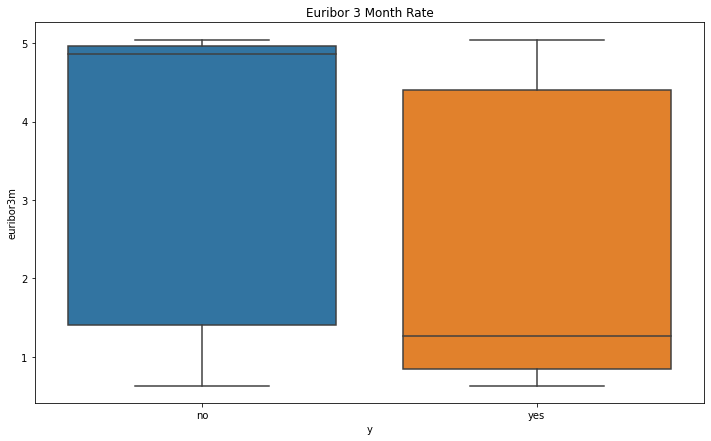

In [294]:
#Boxplot of the Euribor 3 Month Rate divided into Yes/No
plt.figure(figsize=(12,7))
sns.boxplot(data=bankaddfull,x='y',y='euribor3m')
plt.title('Euribor 3 Month Rate')

Text(0.5, 1.0, 'Euribor 3 Month Rate')

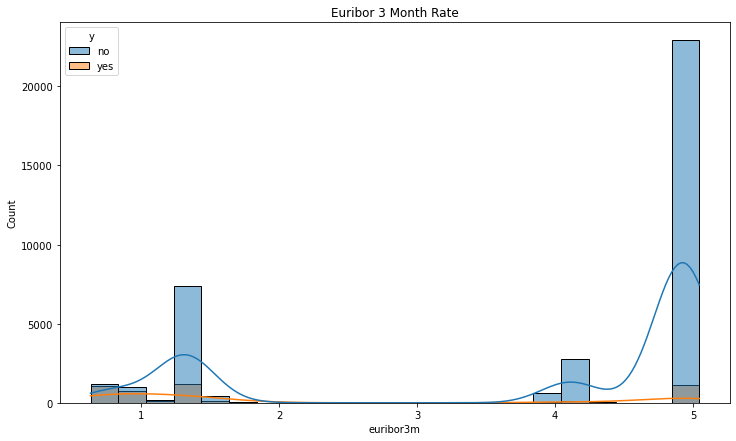

In [295]:
#Histogram of the Euribor 3  Month Rate divided into Yes/No
plt.figure(figsize=(12,7))
sns.histplot(data=bankaddfull,hue='y',x='euribor3m', kde=True)
plt.title('Euribor 3 Month Rate')

In [122]:
yesaddfull['euribor3m'].median()

1.266

In [123]:
noaddfull['euribor3m'].median()

4.857

There is a significant difference from the median of the yes and no. It could be inferred that a lower Euribor 3M  rate increases the likelihood of a positive outcome. This shows that this could be a significant factor.

## Number of Employees (nr.employed)

Text(0.5, 1.0, 'Number of Employees')

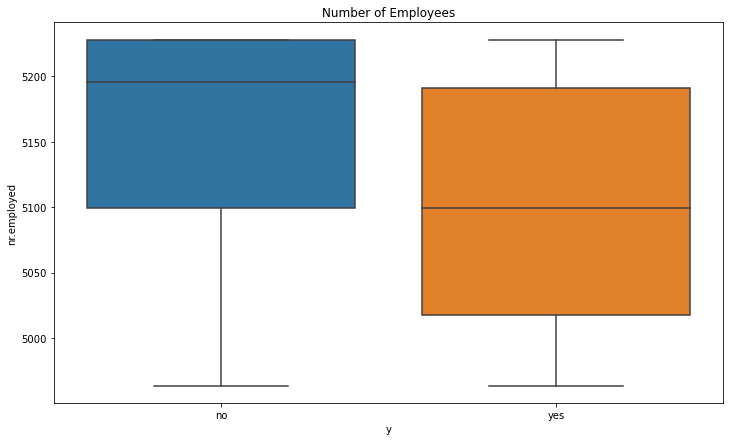

In [296]:
#Boxplot of the Number of Employees divided into Yes/No
plt.figure(figsize=(12,7))
sns.boxplot(data=bankaddfull,x='y',y='nr.employed')
plt.title('Number of Employees')

Text(0.5, 1.0, 'Number of Employees')

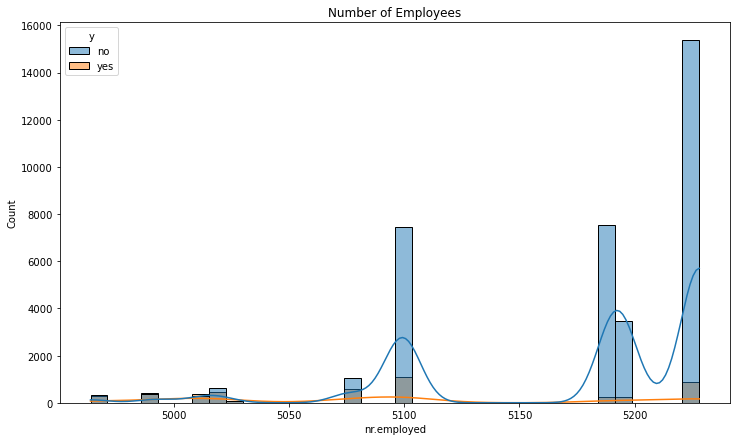

In [297]:
#Histogram of the Number of Employees divided into Yes/No
plt.figure(figsize=(12,7))
sns.histplot(data=bankaddfull,hue='y',x='nr.employed', kde=True)
plt.title('Number of Employees')

In [126]:
yesaddfull['nr.employed'].median()

5099.1

In [127]:
noaddfull['nr.employed'].median()

5195.8

There is a significant difference of the medians of the yes and no. A lower median seems to increase the likelihood of a positive outcome.

## Contact and Duration

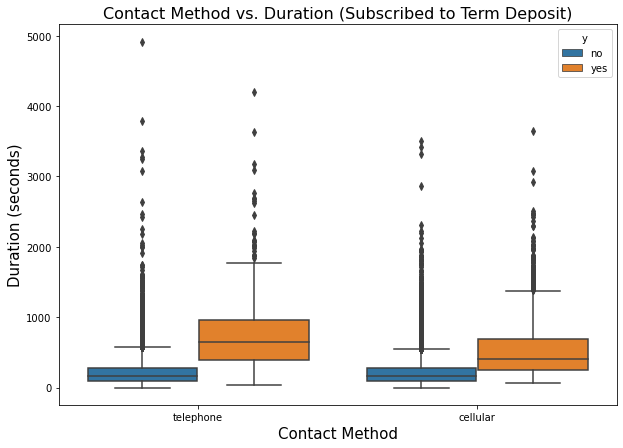

In [300]:
#Boxplot of the Contact Method vs Contact Duration (seconds) divided into Yes/No
fig_dims = (10,7)
fig, ax = plt.subplots(figsize = fig_dims)

sns.boxplot(data=bankaddfull, x='contact', y='duration', ax=ax, hue='y');

plt.title("Contact Method vs. Duration (Subscribed to Term Deposit)", fontsize=16);
plt.xlabel("Contact Method", fontsize=15);
plt.ylabel("Duration (seconds)", fontsize=15);

## Corellation Heatmap

<AxesSubplot:>

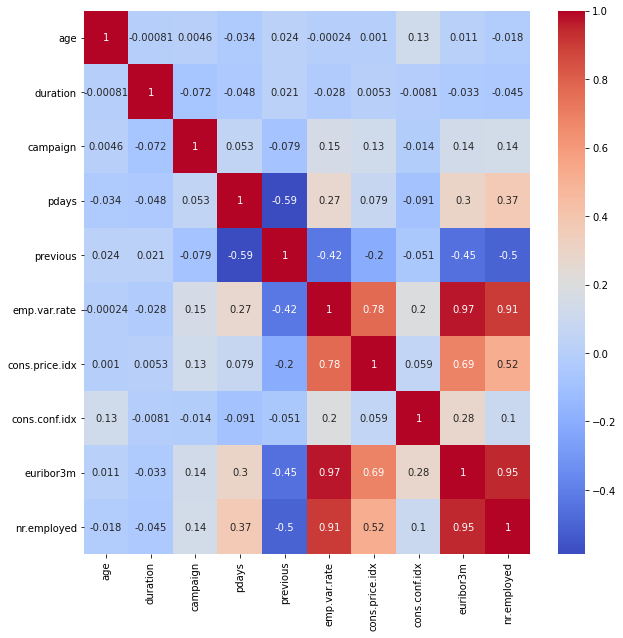

In [130]:
#Corellation Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(bankaddfull.corr(), annot=True, cmap='coolwarm')

emp.var.rate, cons.price.idx, euribor3m and nr.employed all have very strong corellation. The rest of the data are either moderate or weak corellation.

# Final Dataset

## Removals? 

Although some parts of the data do not seem to be significant, it is decided that all parts of the dataset will be used in order to train each model with as much information as necessary for it to be accurate.

## Converting Categorical to Binary  

### Using Dummy Variable One-Hot Encoding

In [131]:
#Conveting Yes to Dummy
yDum = pd.get_dummies(bankaddfull['y'],drop_first=True)
yDum

,yes
0,0
1,0
2,0
3,0
4,0
...,...
41183,1
41184,0
41185,0
41186,1


In [132]:
#Converting Job to Dummy 
jobDum = pd.get_dummies(bankaddfull['job'],drop_first=True, prefix='job')
jobDum

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,1,0,0,0,0,0,0
41184,1,0,0,0,0,0,0,0,0,0,0
41185,0,0,0,0,1,0,0,0,0,0,0
41186,0,0,0,0,0,0,0,0,1,0,0


In [133]:
#Converting Marital to Dummy 
maritalDum = pd.get_dummies(bankaddfull['marital'],drop_first=True, prefix='marital')
maritalDum

,marital_married,marital_single,marital_unknown
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
41183,1,0,0
41184,1,0,0
41185,1,0,0
41186,1,0,0


In [134]:
#Converting Education to Dummy
eduDum = pd.get_dummies(bankaddfull['education'],drop_first=True,prefix='education')
eduDum

,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
41183,0,0,0,0,1,0,0
41184,0,0,0,0,1,0,0
41185,0,0,0,0,0,1,0
41186,0,0,0,0,1,0,0


In [135]:
#Converting Default to Dummy
defaultDum = pd.get_dummies(bankaddfull['default'],drop_first=True,prefix='default')
defaultDum

,default_unknown,default_yes
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
41183,0,0
41184,0,0
41185,0,0
41186,0,0


In [136]:
#Converting Housing to Dummy
housingDum = pd.get_dummies(bankaddfull['housing'],drop_first=True,prefix='housing')
housingDum

,housing_unknown,housing_yes
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
41183,0,1
41184,0,0
41185,0,1
41186,0,0


In [137]:
#Converting Loan to Dummy
loanDum = pd.get_dummies(bankaddfull['loan'],drop_first=True,prefix='loan')
loanDum

,loan_unknown,loan_yes
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
41183,0,0
41184,0,0
41185,0,0
41186,0,0


In [138]:
#Converting contact to Dummy
contactDum = pd.get_dummies(bankaddfull['contact'],drop_first=True,prefix='contact')
contactDum

,contact_telephone
0,1
1,1
2,1
3,1
4,1
...,...
41183,0
41184,0
41185,0
41186,0


In [139]:
#Converting Month to Dummy
monthDum = pd.get_dummies(bankaddfull['month'],drop_first=True,prefix='month')
monthDum

,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,0,0,1,0,0
41184,0,0,0,0,0,0,1,0,0
41185,0,0,0,0,0,0,1,0,0
41186,0,0,0,0,0,0,1,0,0


In [140]:
#Converting poutcome to Dummy
poutcomeDum = pd.get_dummies(bankaddfull['poutcome'],drop_first=True,prefix='poutcome')
poutcomeDum

,poutcome_nonexistent,poutcome_success
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
41183,1,0
41184,1,0
41185,1,0
41186,1,0


In [141]:
#Converting Day of Week to Dummy
dayDum = pd.get_dummies(bankaddfull['day_of_week'],drop_first=True)
dayDum

,mon,thu,tue,wed
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
41183,0,0,0,0
41184,0,0,0,0
41185,0,0,0,0
41186,0,0,0,0


In [142]:
#Add converted data and drop the original (unconverted) data into a DF named dataDummy
dataDummy = pd.concat((bankaddfull, yDum, jobDum,maritalDum,eduDum,defaultDum,housingDum,loanDum,contactDum,monthDum,poutcomeDum,dayDum),axis=1)
dataDummy = dataDummy.drop(['y','job','marital','education','default','housing','loan','contact','month','poutcome','day_of_week'], axis=1)
dataDummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41176 non-null  int64  
 1   duration                       41176 non-null  int64  
 2   campaign                       41176 non-null  int64  
 3   pdays                          41176 non-null  int64  
 4   previous                       41176 non-null  int64  
 5   emp.var.rate                   41176 non-null  float64
 6   cons.price.idx                 41176 non-null  float64
 7   cons.conf.idx                  41176 non-null  float64
 8   euribor3m                      41176 non-null  float64
 9   nr.employed                    41176 non-null  float64
 10  yes                            41176 non-null  uint8  
 11  job_blue-collar                41176 non-null  uint8  
 12  job_entrepreneur               41176 non-null 

In [143]:
dataDummy

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,mon,thu,tue,wed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,1,0,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,1,0,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,1,0,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,1,0,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,1,0,0,0,0,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,1,0,0,0,0,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,1,0,0,0,0,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,1,0,0,0,0,0


### Label Econding 

In [144]:
#Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [145]:
#Converting Yes to Label Encoder
#Creating DF
yesLE= pd.DataFrame(bankaddfull['y'])
#Creating LabelEncoder instance
labelencoder = LabelEncoder()
#Assigning Numerical Values and adding to the DF
yesLE['yes_LE'] = labelencoder.fit_transform(yesLE['y'])
#Dropping 'y' column
yesLE= yesLE.drop(['y'],axis=1)
yesLE

,yes_LE
0,0
1,0
2,0
3,0
4,0
...,...
41183,1
41184,0
41185,0
41186,1


In [146]:
#Converting Job to Label Encoder
#Creating DF
jobLE= pd.DataFrame(bankaddfull['job'])
#Creating LabelEncoder instance
labelencoder = LabelEncoder()
#Assigning Numerical Values and adding to the DF
jobLE['job_LE'] = labelencoder.fit_transform(jobLE['job'])
#Dropping 'job' column
jobLE= jobLE.drop(['job'],axis=1)
jobLE

,job_LE
0,3
1,7
2,7
3,0
4,7
...,...
41183,5
41184,1
41185,5
41186,9


In [147]:
#Converting Marital Status to Label Encoder
#Creating DF
maritalLE= pd.DataFrame(bankaddfull['marital'])
#Creating LabelEncoder instance
labelencoder = LabelEncoder()
#Assigning Numerical Values and adding to the DF
maritalLE['marital_LE'] = labelencoder.fit_transform(maritalLE['marital'])
#Dropping 'marital' column
maritalLE= maritalLE.drop(['marital'],axis=1)
maritalLE

,marital_LE
0,1
1,1
2,1
3,1
4,1
...,...
41183,1
41184,1
41185,1
41186,1


In [148]:
#Converting Education to Label Encoder
#Creating DF
educationLE= pd.DataFrame(bankaddfull['education'])
#Creating LabelEncoder instance
labelencoder = LabelEncoder()
#Assigning Numerical Values and adding to the DF
educationLE['education_LE'] = labelencoder.fit_transform(educationLE['education'])
#Dropping 'education' column
educationLE= educationLE.drop(['education'],axis=1)
educationLE

,education_LE
0,0
1,3
2,3
3,1
4,3
...,...
41183,5
41184,5
41185,6
41186,5


In [149]:
#Converting Default Status to Label Encoder
#Creating DF
defaultLE= pd.DataFrame(bankaddfull['default'])
#Creating LabelEncoder instance
labelencoder = LabelEncoder()
#Assigning Numerical Values and adding to the DF
defaultLE['default_LE'] = labelencoder.fit_transform(defaultLE['default'])
#Dropping 'default' column
defaultLE= defaultLE.drop(['default'],axis=1)
defaultLE

,default_LE
0,0
1,1
2,0
3,0
4,0
...,...
41183,0
41184,0
41185,0
41186,0


In [150]:
#Converting Housing Loan to Label Encoder
#Creating DF
housingLE= pd.DataFrame(bankaddfull['housing'])
#Creating LabelEncoder instance
labelencoder = LabelEncoder()
#Assigning Numerical Values and adding to the DF
housingLE['housing_LE'] = labelencoder.fit_transform(housingLE['housing'])
#Dropping 'housing' column
housingLE= housingLE.drop(['housing'],axis=1)
housingLE

,housing_LE
0,0
1,0
2,2
3,0
4,0
...,...
41183,2
41184,0
41185,2
41186,0


In [151]:
#Converting Loan to Label Encoder
#Creating DF
loanLE= pd.DataFrame(bankaddfull['loan'])
#Creating LabelEncoder instance
labelencoder = LabelEncoder()
#Assigning Numerical Values and adding to the DF
loanLE['loan_LE'] = labelencoder.fit_transform(loanLE['loan'])
#Dropping 'loan' column
loanLE= loanLE.drop(['loan'],axis=1)
loanLE

,loan_LE
0,0
1,0
2,0
3,0
4,2
...,...
41183,0
41184,0
41185,0
41186,0


In [152]:
#Converting Contact Method to Label Encoder
#Creating DF
contactLE= pd.DataFrame(bankaddfull['contact'])
#Creating LabelEncoder instance
labelencoder = LabelEncoder()
#Assigning Numerical Values and adding to the DF
contactLE['contact_LE'] = labelencoder.fit_transform(contactLE['contact'])
#Dropping 'contact' column
contactLE= contactLE.drop(['contact'],axis=1)
contactLE

,contact_LE
0,1
1,1
2,1
3,1
4,1
...,...
41183,0
41184,0
41185,0
41186,0


In [153]:
#Converting Month to Label Encoder
#Creating DF
monthLE= pd.DataFrame(bankaddfull['month'])
#Creating LabelEncoder instance
labelencoder = LabelEncoder()
#Assigning Numerical Values and adding to the DF
monthLE['month_LE'] = labelencoder.fit_transform(monthLE['month'])
#Dropping 'month' column
monthLE= monthLE.drop(['month'],axis=1)
monthLE

,month_LE
0,6
1,6
2,6
3,6
4,6
...,...
41183,7
41184,7
41185,7
41186,7


In [154]:
#Converting Previous Outcome to Label Encoder
#Creating DF
poutcomeLE= pd.DataFrame(bankaddfull['poutcome'])
#Creating LabelEncoder instance
labelencoder = LabelEncoder()
#Assigning Numerical Values and adding to the DF
poutcomeLE['poutcome_LE'] = labelencoder.fit_transform(poutcomeLE['poutcome'])
#Dropping 'poutcome' column
poutcomeLE= poutcomeLE.drop(['poutcome'],axis=1)
poutcomeLE

,poutcome_LE
0,1
1,1
2,1
3,1
4,1
...,...
41183,1
41184,1
41185,1
41186,1


In [155]:
#Converting Day of the Week to Label Encoder
#Creating DF
dayLE= pd.DataFrame(bankaddfull['day_of_week'])
#Creating LabelEncoder instance
labelencoder = LabelEncoder()
#Assigning Numerical Values and adding to the DF
dayLE['day_LE'] = labelencoder.fit_transform(dayLE['day_of_week'])
#Dropping 'y' column
dayLE= dayLE.drop(['day_of_week'],axis=1)
dayLE

,day_LE
0,1
1,1
2,1
3,1
4,1
...,...
41183,0
41184,0
41185,0
41186,0


In [156]:
#Add converted data and drop the original (unconverted) data into a DF named dataLE
dataLE = pd.concat((bankaddfull, yesLE, jobLE,maritalLE,educationLE,defaultLE,housingLE,loanLE,contactLE,monthLE,poutcomeLE,dayLE),axis=1)
dataLE = dataLE.drop(['y','job','marital','education','default','housing','loan','contact','month','poutcome','day_of_week'], axis=1)
dataLE

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,job_LE,marital_LE,education_LE,default_LE,housing_LE,loan_LE,contact_LE,month_LE,poutcome_LE,day_LE
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,3,1,0,0,0,0,1,6,1,1
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,7,1,3,1,0,0,1,6,1,1
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,7,1,3,0,2,0,1,6,1,1
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,1,0,0,0,1,6,1,1
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,7,1,3,0,0,2,1,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,5,1,5,0,2,0,0,7,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,1,5,0,0,0,0,7,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,5,1,6,0,2,0,0,7,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,9,1,5,0,0,0,0,7,1,0


## All Dataframes 

- data= Finalized dataset
- dataDummy = Finalized dataset using Dummy Variables
- dataLE = Finalized dataset using Label Encoding
- bankaddfull = Bank Additional Full.csv
- bankadd = Bank Additional.csv
- bankfull = Bank Full.csv
- bank = Bank.csv
- yesaddfull = Only yes from Bank Additional Full.csv
- noaddfull = Only no from Bank Additional Full.csv

Percentages
- yesAgeDF = Yes Percentage depending on Age
- yesJobDF = Yes Percentage depending on Job Title
- yesMaritalDF = Yes Percentage depending on Marital Status
- yesEducationDF = Yes Percentage depending on Education
- yesDefaultDF = Yes Percentage depending on Loan Default
- yesHousingDF = Yes Percentage depending on Housing Loan
- yesPOutcomeDF = Yes Percentage depending on Previous Outcome
- yesDayWeekDF = Yes Percentage depending on Day of the Week
- yesMonthDF = Yes Percentage depending on Month of the Year
- yesLoanDF = Yes Percentage depending on Personal Loan
- yesContactDF = Yes Percentage depending on Contact Method

# Modeling the Data

In [157]:
#Importing Important Modeling 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Label Encoding Dataset

In [158]:
dataLE = dataLE.drop_duplicates()
dataLE.shape

(41176, 21)

In [159]:
#Assigning X and Y variables using Label Encoded data
dataLE_X = dataLE.loc[:, dataLE.columns != 'yes_LE']
print("Shape of X:", dataLE_X.shape)
dataLE_y = dataLE["yes_LE"]
print("Shape of Y:", dataLE_y.shape)

Shape of X: (41176, 20)
Shape of Y: (41176,)


### Spliting the Data

In [160]:
from sklearn.model_selection import train_test_split
X_LE_train, X_LE_test, y_LE_train, y_LE_test = train_test_split(dataLE_X, dataLE_y, test_size=0.25, random_state=42)

In [161]:
X_LE_train

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_LE,marital_LE,education_LE,default_LE,housing_LE,loan_LE,contact_LE,month_LE,poutcome_LE,day_LE
1975,43,257,3,999,0,1.1,93.994,-36.4,4.855,5191.0,4,1,0,0,2,0,1,6,1,0
33759,24,66,1,999,1,-1.8,92.893,-46.2,1.281,5099.1,8,2,3,0,2,2,0,6,0,4
1731,49,208,3,999,0,1.1,93.994,-36.4,4.855,5191.0,0,1,6,1,0,0,1,6,1,0
17502,40,1025,1,999,0,1.4,93.918,-42.7,4.962,5228.1,6,1,7,1,0,0,1,3,1,1
16861,41,225,1,999,0,1.4,93.918,-42.7,4.962,5228.1,1,2,1,1,0,0,0,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6266,34,100,2,999,0,1.1,93.994,-36.4,4.857,5191.0,1,1,2,0,0,2,1,6,1,3
11285,29,120,1,999,0,1.4,94.465,-41.8,4.961,5228.1,0,1,2,0,2,0,1,4,1,2
38169,71,250,2,999,2,-3.4,92.431,-26.9,0.754,5017.5,5,1,0,0,0,0,0,8,0,2
860,40,295,2,999,0,1.1,93.994,-36.4,4.856,5191.0,4,1,6,0,2,0,1,6,1,4


In [162]:
X_LE_test

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_LE,marital_LE,education_LE,default_LE,housing_LE,loan_LE,contact_LE,month_LE,poutcome_LE,day_LE
36264,59,1460,1,999,0,-2.9,92.963,-40.8,1.266,5076.2,5,1,5,0,2,2,0,4,1,1
32672,34,248,1,999,1,-1.8,92.893,-46.2,1.299,5099.1,1,1,2,0,0,0,0,6,0,1
40872,32,275,2,999,0,-1.1,94.601,-49.5,0.959,4963.6,9,1,5,0,2,0,0,8,1,4
32907,53,186,2,999,1,-1.8,92.893,-46.2,1.299,5099.1,0,1,3,0,2,2,0,6,0,1
16464,24,184,1,999,0,1.4,93.918,-42.7,4.963,5228.1,7,2,2,0,2,0,1,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10553,37,243,1,999,0,1.4,94.465,-41.8,4.961,5228.1,6,1,2,0,0,0,1,4,1,3
3589,28,250,1,999,0,1.1,93.994,-36.4,4.859,5191.0,0,2,6,0,2,0,1,6,1,0
10596,31,91,2,999,0,1.4,94.465,-41.8,4.961,5228.1,9,2,6,0,0,0,1,4,1,3
1938,50,878,3,999,0,1.1,93.994,-36.4,4.855,5191.0,1,0,2,0,0,0,1,6,1,0


### Logistic Regression

In [163]:
#Import Logistic Regression
from sklearn.linear_model import LogisticRegression

In [164]:
#Fit data
log_LE = LogisticRegression()
log_LE.fit(X_LE_train,y_LE_train)

/Users/timothymaggawisesa/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [165]:
#Predict
log_LE_predict = log_LE.predict(X_LE_test)
log_LE_predict

array([1, 0, 0, ..., 0, 0, 0])

In [166]:
#Accuracy of Model
print('Accuracy (%):', log_LE.score(X_LE_test,y_LE_test)*100)

Accuracy (%): 90.66446473673984


In [167]:
#Classification Report
print(classification_report(y_LE_test,log_LE_predict))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9094
           1       0.66      0.40      0.50      1200

    accuracy                           0.91     10294
   macro avg       0.79      0.69      0.72     10294
weighted avg       0.89      0.91      0.90     10294



In [168]:
#Confusion Matrix
confusion_matrix(y_LE_test,log_LE_predict)

array([[8850,  244],
       [ 717,  483]])

### Random Forest

In [169]:
#Import Random Forest
from sklearn.ensemble import RandomForestClassifier

In [170]:
#Fit data
rf_LE = RandomForestClassifier()
rf_LE.fit(X_LE_train, y_LE_train)

RandomForestClassifier()

In [171]:
#Predict
rf_LE_predict = rf_LE.predict(X_LE_test)
rf_LE_predict

array([0, 0, 1, ..., 0, 0, 0])

In [172]:
#Accuracy of Model
print('Accuracy (%):', rf_LE.score(X_LE_test,y_LE_test)*100)

Accuracy (%): 91.23761414416165


In [173]:
#Classification Report
print(classification_report(y_LE_test,rf_LE_predict))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      9094
           1       0.66      0.50      0.57      1200

    accuracy                           0.91     10294
   macro avg       0.80      0.73      0.76     10294
weighted avg       0.90      0.91      0.91     10294



In [174]:
#Confusion Matrix
confusion_matrix(y_LE_test,rf_LE_predict)

array([[8789,  305],
       [ 597,  603]])

### KNN

In [175]:
#Import KNN
from sklearn.neighbors import KNeighborsClassifier

In [176]:
#error_rate = []
#for i in range(1,40):
 #   knn_LE = KNeighborsClassifier(n_neighbors=i)
  #  knn_LE.fit(X_LE_train,y_LE_train)
   # pred_i = knn_LE.predict(X_LE_test)
    
    #error_rate.append(np.mean(pred_i != y_LE_test))
#plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 #        markerfacecolor='red', markersize=10)
#plt.title('Error Rate vs. K Value')
#plt.xlabel('K')
#plt.ylabel('Error Rate')

**NOTE:** The code above is commented out because it takes too long to run on my device. The K value is obtained by running the code via Google Colab through [this link](https://drive.google.com/file/d/10rTOm5mlJ8FP3JDjT5Q4laQPM-GXn9V-/view?usp=sharing)

In [177]:
#Fit Data
knn_LE = KNeighborsClassifier(n_neighbors=15)
knn_LE.fit(X_LE_train, y_LE_train)

KNeighborsClassifier(n_neighbors=15)

In [178]:
#Predict
knn_LE_predict = knn_LE.predict(X_LE_test)

In [179]:
#Accuracy of Model
print('Accuracy (%):', knn_LE.score(X_LE_test,y_LE_test)*100)

Accuracy (%): 91.0918981931222


In [180]:
#Classification Report
print(classification_report(y_LE_test,knn_LE_predict))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9094
           1       0.66      0.49      0.56      1200

    accuracy                           0.91     10294
   macro avg       0.80      0.73      0.76     10294
weighted avg       0.90      0.91      0.91     10294



In [181]:
#Confusion Matrix
confusion_matrix(y_LE_test,knn_LE_predict)

array([[8789,  305],
       [ 612,  588]])

### Linear SVM

In [182]:
#Import SVM
from sklearn.svm import LinearSVC

In [183]:
#Fit data using LinearSVC
svm_LE = LinearSVC()
svm_LE.fit(X_LE_train, y_LE_train)

/Users/timothymaggawisesa/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [184]:
#Predict
svm_LE_predict = svm_LE.predict(X_LE_test)
svm_LE_predict

array([1, 0, 0, ..., 0, 0, 0])

In [185]:
#Accuracy of Model
print('Accuracy (%):', svm_LE.score(X_LE_test,y_LE_test)*100)

Accuracy (%): 88.83815815037886


In [186]:
#Classification Report
print(classification_report(y_LE_test,svm_LE_predict))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      9094
           1       0.74      0.07      0.12      1200

    accuracy                           0.89     10294
   macro avg       0.81      0.53      0.53     10294
weighted avg       0.87      0.89      0.84     10294



In [187]:
#Confusion Matrix
confusion_matrix(y_LE_test,svm_LE_predict)

array([[9066,   28],
       [1121,   79]])

In [188]:
#Importing SVC
from sklearn.svm import SVC

In [189]:
#Fit data using SVC(kernel='linear')
svm2_LE = SVC(kernel='linear')
svm2_LE.fit(X_LE_train, y_LE_train)

SVC(kernel='linear')

In [190]:
#Predict
svm2_LE_predict = svm2_LE.predict(X_LE_test)
svm2_LE_predict

array([1, 0, 1, ..., 0, 0, 0])

In [191]:
#Accuracy of Model
print('Accuracy (%):', svm2_LE.score(X_LE_test,y_LE_test)*100)

Accuracy (%): 89.7415970468234


In [192]:
#Classification Report
print(classification_report(y_LE_test,svm2_LE_predict))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      9094
           1       0.57      0.48      0.52      1200

    accuracy                           0.90     10294
   macro avg       0.75      0.72      0.73     10294
weighted avg       0.89      0.90      0.89     10294



In [193]:
#Confusion Matrix
confusion_matrix(y_LE_test,svm2_LE_predict)

array([[8660,  434],
       [ 622,  578]])

## Dummies Dataset

In [194]:
dataDum = dataDummy.drop_duplicates()
dataDum.shape

(41176, 54)

In [195]:
#Assigning X and Y variables using Dummy Variable One-Hot Encoded data
dataDum_X = dataDum.loc[:, dataDum.columns != 'yes']
print("Shape of X:", dataDum_X.shape)
dataDum_y = dataDum['yes']
print("Shape of Y:", dataDum_y.shape)

Shape of X: (41176, 53)
Shape of Y: (41176,)


### Spliting the Data

In [196]:
from sklearn.model_selection import train_test_split
X_Dum_train, X_Dum_test, y_Dum_train, y_Dum_test = train_test_split(dataDum_X, dataDum_y, test_size=0.25, random_state=42)

In [197]:
X_Dum_train

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,mon,thu,tue,wed
1975,43,257,3,999,0,1.1,93.994,-36.4,4.855,5191.0,...,1,0,0,0,1,0,0,0,0,0
33759,24,66,1,999,1,-1.8,92.893,-46.2,1.281,5099.1,...,1,0,0,0,0,0,0,0,0,1
1731,49,208,3,999,0,1.1,93.994,-36.4,4.855,5191.0,...,1,0,0,0,1,0,0,0,0,0
17502,40,1025,1,999,0,1.4,93.918,-42.7,4.962,5228.1,...,0,0,0,0,1,0,1,0,0,0
16861,41,225,1,999,0,1.4,93.918,-42.7,4.962,5228.1,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6266,34,100,2,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
11285,29,120,1,999,0,1.4,94.465,-41.8,4.961,5228.1,...,0,0,0,0,1,0,0,1,0,0
38169,71,250,2,999,2,-3.4,92.431,-26.9,0.754,5017.5,...,0,0,1,0,0,0,0,1,0,0
860,40,295,2,999,0,1.1,93.994,-36.4,4.856,5191.0,...,1,0,0,0,1,0,0,0,0,1


In [198]:
y_Dum_test

36264    1
32672    0
40872    1
32907    0
16464    0
        ..
10553    0
3589     0
10596    0
1938     0
549      0
Name: yes, Length: 10294, dtype: uint8

### Logistic Regression

In [199]:
#Import Logistic Regression
from sklearn.linear_model import LogisticRegression

In [200]:
#Fit data
log_Dum = LogisticRegression()
log_Dum.fit(X_Dum_train,y_Dum_train)

/Users/timothymaggawisesa/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [201]:
#Predict
log_Dum_predict = log_Dum.predict(X_Dum_test)
log_Dum_predict

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [202]:
#Accuracy of Model
print('Accuracy (%):', log_Dum.score(X_Dum_test,y_Dum_test)*100)

Accuracy (%): 90.52846318243637


In [203]:
#Classification Report
print(classification_report(y_Dum_test,log_Dum_predict))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      9094
           1       0.67      0.37      0.48      1200

    accuracy                           0.91     10294
   macro avg       0.80      0.67      0.71     10294
weighted avg       0.89      0.91      0.89     10294



In [204]:
#Confusion Matrix
confusion_matrix(y_Dum_test,log_Dum_predict)

array([[8877,  217],
       [ 758,  442]])

### Random Forest

In [205]:
#Import Random Forest
from sklearn.ensemble import RandomForestClassifier

In [206]:
#Fit data
rf_Dum = RandomForestClassifier()
rf_Dum.fit(X_Dum_train, y_Dum_train)

RandomForestClassifier()

In [207]:
#Predict
rf_Dum_predict = rf_Dum.predict(X_Dum_test)
rf_Dum_predict

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [208]:
#Accuracy of Model
print('Accuracy (%):', rf_Dum.score(X_Dum_test,y_Dum_test)*100)

Accuracy (%): 91.2278997474257


In [209]:
#Classification Report
print(classification_report(y_Dum_test,rf_Dum_predict))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9094
           1       0.68      0.47      0.55      1200

    accuracy                           0.91     10294
   macro avg       0.81      0.72      0.75     10294
weighted avg       0.90      0.91      0.91     10294



In [210]:
#Confusion Matrix
confusion_matrix(y_Dum_test,rf_Dum_predict)

array([[8829,  265],
       [ 638,  562]])

### KNN

In [211]:
#Import KNN
from sklearn.neighbors import KNeighborsClassifier

In [212]:
#error_rate = []
#for i in range(1,40):
 #   knn_Dum = KNeighborsClassifier(n_neighbors=i)
  #  knn_Dum.fit(X_Dum_train,y_Dum_train)
   # pred_i = knn_Dum.predict(X_Dum_test)
    
    #error_rate.append(np.mean(pred_i != y_Dum_test))
            #PLOT THE ERROR RATE ON A GRAPH TO FIND K EASILY
#plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 #        markerfacecolor='red', markersize=10)
#plt.title('Error Rate vs. K Value')
#plt.xlabel('K')
#plt.ylabel('Error Rate')

**NOTE:** The code above is commented out because it takes too long to run on my device. The K value is obtained by running the code via Google Colab through [this link](https://drive.google.com/file/d/10rTOm5mlJ8FP3JDjT5Q4laQPM-GXn9V-/view?usp=sharing)

In [213]:
#Fit Data
knn_Dum = KNeighborsClassifier(n_neighbors=17)
knn_Dum.fit(X_Dum_train, y_Dum_train)

KNeighborsClassifier(n_neighbors=17)

In [214]:
#Predict
knn_Dum_predict = knn_Dum.predict(X_Dum_test)

In [215]:
#Accuracy of Model
print('Accuracy (%):', knn_Dum.score(X_Dum_test,y_Dum_test)*100)

Accuracy (%): 90.99475422576258


In [216]:
#Classification Report
print(classification_report(y_Dum_test,knn_Dum_predict))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9094
           1       0.65      0.48      0.56      1200

    accuracy                           0.91     10294
   macro avg       0.79      0.73      0.75     10294
weighted avg       0.90      0.91      0.90     10294



In [217]:
#Confusion Matrix
confusion_matrix(y_Dum_test,knn_Dum_predict)

array([[8786,  308],
       [ 619,  581]])

### Linear SVM

In [218]:
#Import SVM
from sklearn.svm import LinearSVC

In [219]:
#Fit data using LinearSVC
svm_Dum = LinearSVC()
svm_Dum.fit(X_Dum_train, y_Dum_train)

/Users/timothymaggawisesa/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [220]:
#Predict
svm_Dum_predict = svm_Dum.predict(X_Dum_test)
svm_Dum_predict

array([1, 0, 1, ..., 0, 1, 0], dtype=uint8)

In [221]:
#Accuracy of Model
print('Accuracy (%):', svm_Dum.score(X_Dum_test,y_Dum_test)*100)

Accuracy (%): 81.47464542451914


In [222]:
#Classification Report
print(classification_report(y_Dum_test,svm_Dum_predict))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      9094
           1       0.38      0.90      0.53      1200

    accuracy                           0.81     10294
   macro avg       0.68      0.85      0.71     10294
weighted avg       0.91      0.81      0.84     10294



In [223]:
#Confusion Matrix
confusion_matrix(y_Dum_test,svm_Dum_predict)

array([[7311, 1783],
       [ 124, 1076]])

In [224]:
#Importing SVC
from sklearn.svm import SVC

In [225]:
#Fit data using SVC(kernel='linear')
svm2_Dum = SVC(kernel='linear')
svm2_Dum.fit(X_Dum_train, y_Dum_train)

SVC(kernel='linear')

In [226]:
#Predict
svm2_Dum_predict = svm2_Dum.predict(X_Dum_test)
svm2_Dum_predict

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [227]:
#Accuracy of Model
print('Accuracy (%):', svm2_Dum.score(X_Dum_test,y_Dum_test)*100)

Accuracy (%): 89.60559549251992


In [228]:
#Classification Report
print(classification_report(y_Dum_test,svm2_Dum_predict))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      9094
           1       0.57      0.42      0.49      1200

    accuracy                           0.90     10294
   macro avg       0.75      0.69      0.71     10294
weighted avg       0.89      0.90      0.89     10294



In [229]:
#Confusion Matrix
confusion_matrix(y_Dum_test,svm2_Dum_predict)

array([[8715,  379],
       [ 691,  509]])

# Evaluation of Models

## Modeling Using Label Encoding Dataset

In [231]:
print('Accuracy of Models Using the Label Encoding Dataset')
#Accuracy of Logistic Regression
print('Logistic Regression Accuracy (%):', log_LE.score(X_LE_test,y_LE_test)*100)
#Accuracy of Random Forest
print('Random Forest Accuracy (%):', rf_LE.score(X_LE_test,y_LE_test)*100)
#Accuracy of K Nearest Neighbor
print('K Nearest Neighbor Accuracy (%):', knn_LE.score(X_LE_test,y_LE_test)*100)
#Accuracy of LinearSVC
print('LinearSVC Accuracy (%):', svm_LE.score(X_LE_test,y_LE_test)*100)
#Accuracy of SVC(kernel='linear')
print('SVC(kernel=linear) Accuracy (%):', svm2_LE.score(X_LE_test,y_LE_test)*100)

Accuracy of Models Using the Label Encoding Dataset
Logistic Regression Accuracy (%): 90.66446473673984
Random Forest Accuracy (%): 91.23761414416165
K Nearest Neighbor Accuracy (%): 91.0918981931222
LinearSVC Accuracy (%): 88.83815815037886
SVC(kernel=linear) Accuracy (%): 89.7415970468234


In [239]:
eval_LE = [['Logistic Regression',log_LE.score(X_LE_test,y_LE_test)*100],
           ['Random Forest', rf_LE.score(X_LE_test,y_LE_test)*100],
           ['K Nearest Neighbor', knn_LE.score(X_LE_test,y_LE_test)*100],
           ['LinearSVC', svm_LE.score(X_LE_test,y_LE_test)*100],
          ['SVC(kernel=linear)', svm2_LE.score(X_LE_test,y_LE_test)*100]]

In [245]:
eval_LE_df = pd.DataFrame(eval_LE,columns=['Model','LE_Accuracy (%)'])
eval_LE_df.index.name = 'Label Encoding Dataset'
eval_LE_df

,Model,LE_Accuracy (%)
Label Encoding Dataset,,
0,Logistic Regression,90.664465
1,Random Forest,91.237614
2,K Nearest Neighbor,91.091898
3,LinearSVC,88.838158
4,SVC(kernel=linear),89.741597


In [261]:
print('Label Encoding Dataset')
print("Highest Accuracy (%):", eval_LE_df['LE_Accuracy (%)'].max())
print('Index Location: ' ,eval_LE_df['LE_Accuracy (%)'].idxmax())

Label Encoding Dataset
Highest Accuracy (%): 91.23761414416165
Index Location:  1


The best model using Label Encoding is Random Forest with an accuracy of 91.2% (rounded to 3 SF.).

## Modeling Using Dummy Variable One-Hot Encoding Dataset 

In [232]:
print('Accuracy of Models Using the Dummy Variable Dataset')
#Accuracy of Logistic Regression
print('Logistic Regression Accuracy (%):', log_Dum.score(X_Dum_test,y_Dum_test)*100)
#Accuracy of Random Forest
print('Random Forest Accuracy (%):', rf_Dum.score(X_Dum_test,y_Dum_test)*100)
#Accuracy of K Nearest Neighbor
print('K Nearest Neighbor Accuracy (%):', knn_Dum.score(X_Dum_test,y_Dum_test)*100)
#Accuracy of LinearSVC
print('LinearSVC Accuracy (%):', svm_Dum.score(X_Dum_test,y_Dum_test)*100)
#Accuracy of SVC(kernel='linear')
print('SVC(kernel=linear)Accuracy (%):', svm2_Dum.score(X_Dum_test,y_Dum_test)*100)

Accuracy of Models Using the Dummy Variable Dataset
Logistic Regression Accuracy (%): 90.52846318243637
Random Forest Accuracy (%): 91.2278997474257
K Nearest Neighbor Accuracy (%): 90.99475422576258
LinearSVC Accuracy (%): 81.47464542451914
SVC(kernel=linear)Accuracy (%): 89.60559549251992


In [241]:
eval_Dum = [['Logistic Regression',log_Dum.score(X_Dum_test,y_Dum_test)*100],
           ['Random Forest', rf_Dum.score(X_Dum_test,y_Dum_test)*100],
           ['K Nearest Neighbor', knn_Dum.score(X_Dum_test,y_Dum_test)*100],
           ['LinearSVC', svm_Dum.score(X_Dum_test,y_Dum_test)*100],
          ['SVC(kernel=linear)', svm2_Dum.score(X_Dum_test,y_Dum_test)*100]]

In [246]:
#Create a DF
eval_Dum_df = pd.DataFrame(eval_Dum,columns=['Model','Dum_Accuracy (%)'])
eval_Dum_df.index.name = 'Dummy Variable Dataset'
eval_Dum_df

,Model,Dum_Accuracy (%)
Dummy Variable Dataset,,
0,Logistic Regression,90.528463
1,Random Forest,91.227900
2,K Nearest Neighbor,90.994754
3,LinearSVC,81.474645
4,SVC(kernel=linear),89.605595


In [258]:
#Find the highest, and index of the highest accuracy
print("Highest Accuracy (%):", eval_Dum_df['Dum_Accuracy (%)'].max())
print('Index Location: ' ,eval_Dum_df['Dum_Accuracy (%)'].idxmax())

Highest Accuracy (%): 91.2278997474257
Index Location:  1


The best model using Dummy Variables is Random Forest with an accuracy of 91.2% (rounded to 3 SF.).

## Dummy and Label Encoding

In [265]:
#Create a DF with both encoding method's accuracy included.
eval = pd.concat((eval_Dum_df,eval_LE_df['LE_Accuracy (%)']),axis=1)
eval

,Model,Dum_Accuracy (%),LE_Accuracy (%)
0,Logistic Regression,90.528463,90.664465
1,Random Forest,91.227900,91.237614
2,K Nearest Neighbor,90.994754,91.091898
3,LinearSVC,81.474645,88.838158
4,SVC(kernel=linear),89.605595,89.741597


In [270]:
#Difference in percentage of the  Random Forest models
eval_LE_df['LE_Accuracy (%)'].max()-eval_Dum_df['Dum_Accuracy (%)'].max()

0.00971439673595853

## Conclusions

Overall there are very similar results. All models finished in the same position for their respective Encoding type. 
<br><br>
The order of accuracy (from highest to lowest) is as follows for the both encoding methods:
1. Random Forest
2. K Nearest Neighbor
3. Logistic Regression
4. SVC(kernel=linear)
5. LinearSVC

Overall, the Random Forest model works the best for this task. The Label Encoding method has a slightly higher accuracy percentage compaed to the Dummy Variable One-Hot Encoding method, but the difference is almost negligible (0.00971% difference, rounded to 3 SF.). Despite the Logistic Regression seeming perfect for this task, it finished third overall. By far the worst model, in relative terms, in terms of accuracy is the LinearSVC using Dummy Variable One-Hot Encoding with an accuacy of only 81.5%.

### Were We Sucessful? 

In short, yes. We were successful in creating a model with at least 85% accuracy. Our most accurate model was the Random Forest using the Label Encoding method, and it had an accuracy of 91.2% (3 SF.). Not only that, but 9 out of 10 of the models that we tested were also above the 85% accuracy mark that we targeted. The only one that did not pass the 85% threshold was the LinearSVC using Dummy Variable One-Hot Encoding had an accuracy of 81.5%, so it could still be considered to be an excellent model ([Source](https://medium.com/@limavallantin/why-you-should-not-trust-only-in-accuracy-to-measure-machine-learning-performance-a72cf00b4516))

### Possible Implementation and Recommendation

Using these models, the bank could have confidence that they could target their customer more efficiently than randomly calling them. If the model is correct, the bank could avoid those who are predicted to not subscribe, and only call those who are predicted to subscribe. This will help them save a lot of time, money, and resources, and could potentially increase their revenue due to the increase in efficiency of the system. However, this does not mean that the bank should not keep on calling those who are predicted to say no, as in the EDA section we could see that there is a higher chance that the customer would subscribe if they were contacted previously. We recommend that the bank focus on contacting those who are more likely to subscibe.